In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

In [2]:
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
pd.set_option('display.max_columns', None)# 显示所有列
pd.set_option('display.max_rows', 200) # 最多显示200行

### 读取数据

In [66]:
data = pd.read_csv("modelData/vegtation0.csv")
data

,X,Y,Height
0,0,0,3.53613
1,10,0,2.40798
2,20,0,2.41513
3,30,0,2.42287
4,40,0,2.43089
...,...,...,...
956,260,3000,2.34882
957,270,3000,2.11383
958,280,3000,1.90717
959,290,3000,1.72221


In [67]:
l0=data['Height'][:31]   
l0[30] = l0[29]

l1=data['Height'][31:62]   
# l1[30] = l0[29]
l2=data['Height'][31*2:31*3]
l3=data['Height'][31*3:31*4]
l4=data['Height'][31*4:31*5]
l5=data['Height'][31*5:31*6]
l6=data['Height'][31*6:31*7]
l7=data['Height'][31*7:31*8]
l8=data['Height'][31*8:31*9]
l9=data['Height'][31*9:31*10]
l10=data['Height'][31*10:31*11]
l11=data['Height'][31*11:31*12]
l12=data['Height'][31*12:31*13]
l13=data['Height'][31*13:31*14]
l14=data['Height'][31*14:31*15]
l15=data['Height'][31*15:31*16]
l16=data['Height'][31*16:31*17]
l17=data['Height'][31*17:31*18]
l18=data['Height'][31*18:31*19]
l19=data['Height'][31*19:31*20]
l20=data['Height'][31*20:31*21]
l21=data['Height'][31*21:31*22]
l22=data['Height'][31*22:31*23]
l23=data['Height'][31*23:31*24]
l24=data['Height'][31*24:31*25]
l25=data['Height'][31*25:31*26]
l26=data['Height'][31*26:31*27]
l27=data['Height'][31*27:31*28]
l28=data['Height'][31*28:31*29]
l29=data['Height'][31*29:31*30]
l30=data['Height'][31*30:31*31]



## 绘制二维图


In [8]:
nx = 30 +1
ny = 30 +1
xlength = 300
ylength = 3000 

In [69]:
x = np.linspace(0,xlength, nx)
y = np.linspace(0,ylength, ny)

In [70]:
x,x.shape,y,y.shape

(array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.,
        110., 120., 130., 140., 150., 160., 170., 180., 190., 200., 210.,
        220., 230., 240., 250., 260., 270., 280., 290., 300.]),
 (31,),
 array([   0.,  100.,  200.,  300.,  400.,  500.,  600.,  700.,  800.,
         900., 1000., 1100., 1200., 1300., 1400., 1500., 1600., 1700.,
        1800., 1900., 2000., 2100., 2200., 2300., 2400., 2500., 2600.,
        2700., 2800., 2900., 3000.]),
 (31,))

In [71]:
X, Y = np.meshgrid(x, y)
X.shape, Y.shape

((31, 31), (31, 31))

In [72]:
Z=(np.zeros(nx*ny).reshape(nx,ny)).T

In [73]:
    
Z[0,:]  = l1
Z[1,:]  = l1
Z[2,:]  = l2
Z[3,:]  = l3
Z[4,:]  = l4
Z[5,:]  = l5
Z[6,:]  = l6
Z[7,:]  = l7
Z[8,:]  = l8
Z[9,:]  = l9
Z[10,:] = l10
Z[11,:] = l11
Z[12,:] = l12
Z[13,:] = l13
Z[14,:] = l14
Z[15,:] = l15
Z[16,:] = l16
Z[17,:] = l17
Z[18,:] = l18
Z[19,:] = l19
Z[20,:] = l20
Z[21,:] = l21
Z[22,:] = l22
Z[23,:] = l23
Z[24,:] = l24
Z[25,:] = l25
Z[26,:] = l26
Z[27,:] = l27
Z[28,:] = l28
Z[29,:] = l29
Z[30,:] = l29

Text(5, 2700, '$→Height$')

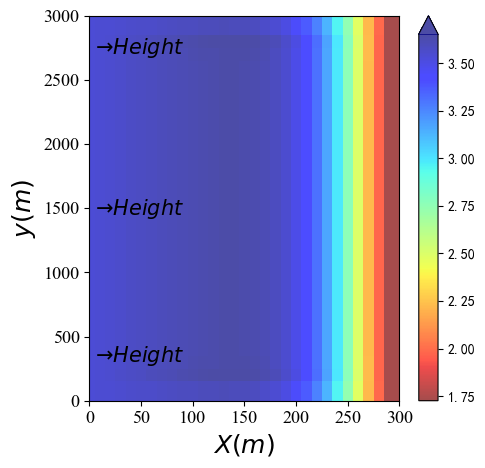

In [74]:
plt.figure(num=1,figsize = (5,5), facecolor=None)
plt.pcolormesh(X, Y, Z, cmap='jet_r',alpha=0.7)
plt.colorbar(extend='max')
plt.xlim(0,300)
plt.ylim(0,3000)
plt.xticks([0,50,100,150,200,250,300],fontproperties = 'Times New Roman',size = 13)
plt.yticks([0,500,1000,1500,2000,2500,3000],fontproperties = 'Times New Roman',size = 13)
plt.xlabel('$X(m)$',size=18)
plt.ylabel('$y(m)$',size=18)
plt.text(5, 300, '$→Height$',fontsize=15)
plt.text(5, 1450, '$→Height$',fontsize=15)
plt.text(5, 2700, '$→Height$',fontsize=15)

In [75]:
data2d.shape

NameError: name 'data2d' is not defined

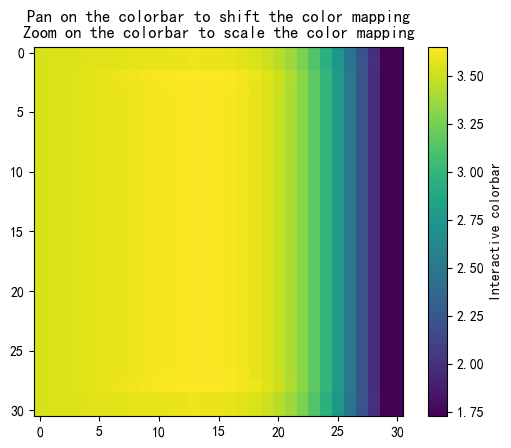

In [ ]:

t = np.linspace(0, 2 * np.pi, 1024)
data2d = np.sin(t)[:, np.newaxis] * np.cos(t)[np.newaxis, :]

fig, ax = plt.subplots()
im = ax.imshow(Z)
ax.set_title('Pan on the colorbar to shift the color mapping\n'
             'Zoom on the colorbar to scale the color mapping')

fig.colorbar(im, ax=ax, label='Interactive colorbar')

plt.show()

# 第四章

## 参数对波浪的衰减影响

### 植被高度

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

KeyboardInterrupt: 

In [ ]:
data = pd.read_csv("modelData/参数对波浪衰减影响.csv")
data

,x0,ah01,x1,ah02,x2,ah04,x3,ah06,x4,ah08,x5,ah10,x6,ah12
0,0,0.200,0,0.200000,0,0.200000,0,0.20000,0,0.200000,0,0.200000,0,0.200000
1,20,0.200,20,0.200000,20,0.200000,20,0.20000,20,0.200000,20,0.200000,20,0.200000
2,40,0.200,40,0.200000,40,0.200000,40,0.20000,40,0.200000,40,0.200000,40,0.200000
3,60,0.200,60,0.200000,60,0.200000,60,0.20000,60,0.200000,60,0.200000,60,0.200000
4,80,0.200,80,0.200000,80,0.200000,80,0.20000,80,0.200000,80,0.200000,80,0.200000
5,100,0.200,100,0.200000,100,0.200000,100,0.20000,100,0.200000,100,0.200000,100,0.200000
6,120,0.199,120,0.197792,120,0.196666,120,0.19534,120,0.194034,120,0.194034,120,0.194034
7,140,0.198,140,0.195584,140,0.193332,140,0.19068,140,0.188068,140,0.188068,140,0.188068
8,160,0.197,160,0.193376,160,0.189998,160,0.18602,160,0.182102,160,0.182102,160,0.182102
9,180,0.196,180,0.191168,180,0.186664,180,0.18136,180,0.176136,180,0.176136,180,0.176136


In [ ]:
x0 = data['x0']
ah01 = data['ah01']
ah02 = data['ah02']
ah04 = data['ah04']
ah06 = data['ah06']
ah08 = data['ah08']
ah10 = data['ah10']
ah12 = data['ah12']


In [ ]:
x1 = np.array([0,1.0, 1.2])
y1 = np.array([0.20,0.17, 0.17])
x_veg=np.array([100, 100])
y_veg=np.array([0.160, 0.203])
x_lim=np.array([1.0, 1.0])
y_lim=np.array([0.170, 0.200])

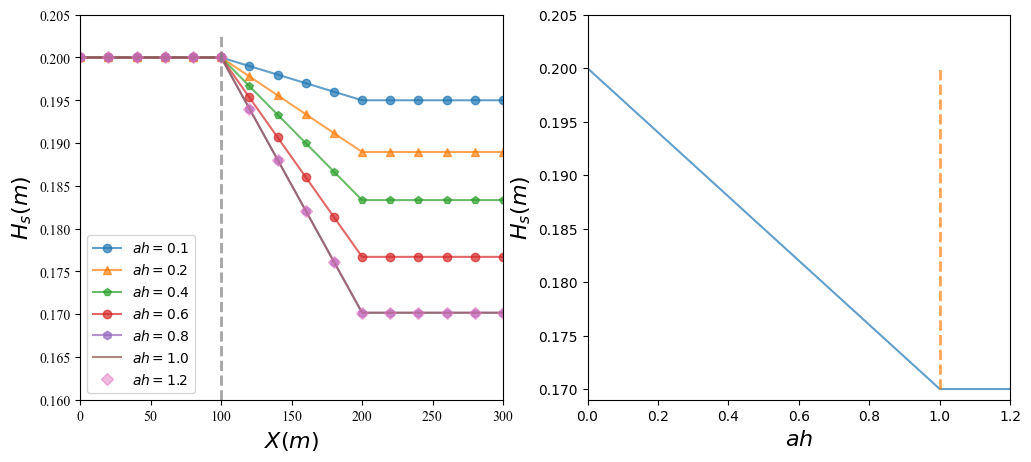

In [ ]:
plt.figure(num=2,figsize = (12,5), facecolor=None)
plt.subplot(121)
plt.plot(x0,ah01,'-o',label='$ah=0.1$',alpha=0.7)
plt.plot(x0,ah02,'-^',label='$ah=0.2$',alpha=0.7)
plt.plot(x0,ah04,'-p',label='$ah=0.4$',alpha=0.7)
plt.plot(x0,ah06,'-o',label='$ah=0.6$',alpha=0.7)
plt.plot(x0,ah08,'-h',label='$ah=0.8$',alpha=0.7)
plt.plot(x0,ah10,'-',label='$ah=1.0$',alpha=0.7)
plt.plot(x0,ah12,'D',label='$ah=1.2$',alpha=0.5)
plt.plot(x_veg,y_veg,'--',alpha=0.7,linewidth=2)
plt.legend(loc='lower left',prop={'family' : 'Times New Roman', 'size'   : 10})

plt.xticks(fontsize=16,fontproperties='Times New Roman') 
plt.yticks(fontsize=16,fontproperties='Times New Roman')
plt.xlim(0,300)
plt.ylim(0.16,0.205)

plt.xlabel('$X(m)$', fontsize=16) 
plt.ylabel('$H_s(m)$', fontsize=16)

plt.subplot(122)
plt.plot(x1,y1,'-',label='$ah=0.1$',alpha=0.7)
plt.plot(x_lim,y_lim,'--',alpha=0.7,linewidth=2)

plt.xlabel('$ah$', fontsize=16) 
plt.ylabel('$H_s(m)$', fontsize=16)
plt.xlim(0,1.2)
plt.ylim(0.169,0.205)
plt.savefig('modelData/植被ah参数对波浪衰减影响.png',dpi=500,bbox_inches='tight')


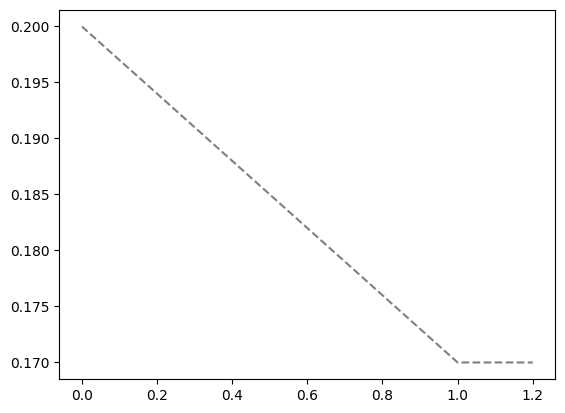

In [ ]:
plt.plot(x1,y1,'--',color='black',alpha=0.5)    

### 与lovas水槽实验对比

In [ ]:
data = pd.read_csv("modelData/与Lova水槽对比.csv")
data

In [ ]:
x0 = data['x0'][:11]
y_lovas_without_veg = data['lovas without vegetation'][:11]

x1 = data['x1'][:10]
y_lovas_with_veg = data[' loavas with vegetation'][:10]

x2 = data['x2'][:49]
y_mendez_without_veg = data['Mendez and Losada without vegetation'][:49]

x3 = data['x3'][:36]
y_mendez_with_veg = data['Mendez and Losada with vegetation'][:36]

x4 = data['x4'][:50]
y_swan_without_veg = data['SWAN without vegetation'][:50]

x5 = data['x5'][:46]
y_swan_with_veg = data['SWAN with vegetation'][:46]


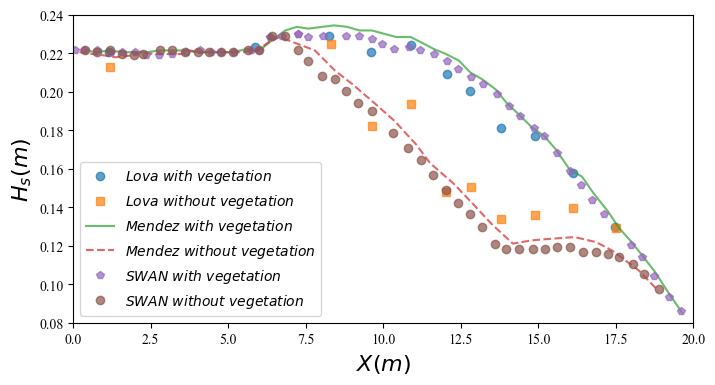

In [ ]:
plt.figure(num=3,figsize = (8,4), facecolor=None)
plt.plot(x0,y_lovas_without_veg,'o',label='$Lova\ with\ vegetation$',alpha=0.7)
plt.plot(x1,y_lovas_with_veg,'s',label='$Lova\ without\ vegetation$',alpha=0.7)
plt.plot(x2,y_mendez_without_veg,'-',label='$Mendez\ with\ vegetation$',alpha=0.7)
plt.plot(x3,y_mendez_with_veg,'--',label='$Mendez\ without\ vegetation$',alpha=0.7)
plt.plot(x4,y_swan_without_veg,'p',label='$SWAN\ with\ vegetation$',alpha=0.7)
plt.plot(x5,y_swan_with_veg,'o',label='$SWAN\ without\ vegetation$',alpha=0.7)
plt.legend()

plt.xticks(fontsize=16,fontproperties='Times New Roman') 
plt.yticks(fontsize=16,fontproperties='Times New Roman')
plt.xlim(0,20)
plt.ylim(0.08,0.24)

plt.xlabel('$X(m)$', fontsize=16) 
plt.ylabel('$H_s(m)$', fontsize=16)
plt.savefig('modelData/Lova水槽对比.png',dpi=500,bbox_inches='tight')


## mendez理论模型

In [ ]:
data = pd.read_csv("theromodel/result.csv")
data

,x,y,Hs
0,0,0,0.28347
1,1,0,0.16547
2,2,0,0.14462
3,3,0,0.12811
4,4,0,0.11476
...,...,...,...
2596,46,500,0.01949
2597,47,500,0.01909
2598,48,500,0.01871
2599,49,500,0.01834


In [ ]:
x = data['x'][:51]
y0 = data['y']
HS = data['Hs']

In [ ]:
for i in range (51):
   varname0 = f'y_{i}'
   exec(f'{varname0} = data["y"][{i*51}:{(i+1)*51}]')


   varname1 = f'Hs_{i}'
   exec(f'{varname1} = data["Hs"][{i*51}:{(i+1)*51}]')

In [ ]:
x1 = np.linspace(0,50, 51)
y1 = np.linspace(0,500, 51)
x1,y1

(array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
        26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
        39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.,
        110., 120., 130., 140., 150., 160., 170., 180., 190., 200., 210.,
        220., 230., 240., 250., 260., 270., 280., 290., 300., 310., 320.,
        330., 340., 350., 360., 370., 380., 390., 400., 410., 420., 430.,
        440., 450., 460., 470., 480., 490., 500.]))

In [ ]:
X1, Y1 = np.meshgrid(x1, y1)
X1.shape, Y1.shape

((51, 51), (51, 51))

In [ ]:
Z1=(np.zeros(51*51).reshape(51,51))
Z1

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
for  i in range (51):
    for j in range (51):
        Z1[i,j] = HS[i*51+j]

In [ ]:
Z1

array([[0.28347, 0.16547, 0.14462, ..., 0.0184 , 0.01804, 0.01769],
       [0.28347, 0.23178, 0.19174, ..., 0.01873, 0.01836, 0.018  ],
       [0.28347, 0.23189, 0.1883 , ..., 0.01846, 0.01811, 0.01778],
       ...,
       [0.28347, 0.23189, 0.1883 , ..., 0.01849, 0.01814, 0.01781],
       [0.28347, 0.23178, 0.19122, ..., 0.01856, 0.01819, 0.01784],
       [0.28347, 0.17727, 0.15381, ..., 0.01871, 0.01834, 0.01798]])

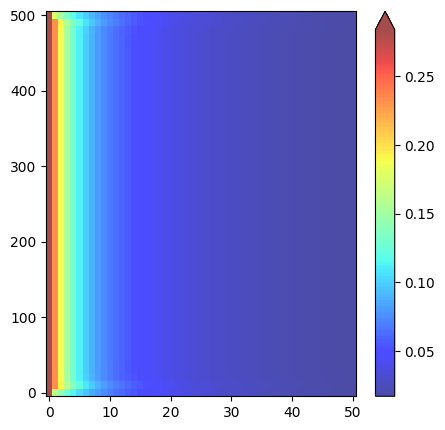

In [ ]:
plt.figure(num=1,figsize = (5,5), facecolor=None)
plt.pcolormesh(X1, Y1, Z1, cmap='jet',alpha=0.7)
plt.colorbar(extend='max')

## dean理论模型

In [ ]:
data = pd.read_csv("D:/Desktop/毕业论文/model/一维modelSWAN/test2/result.csv")
data

,x,y,hs
0,0,0,3.53613
1,10,0,2.40798
2,20,0,2.41513
3,30,0,2.42287
4,40,0,2.43089
...,...,...,...
956,260,3000,2.34882
957,270,3000,2.11383
958,280,3000,1.90717
959,290,3000,1.72221


In [ ]:
x = data['x'][:31]
HS = data['hs']

In [ ]:
for i in range (len(HS)):
    if HS[i] < 0:
        HS[i] = HS[i-1]

In [3]:
x1 = np.linspace(0,300, 31)
y1 = np.linspace(0,3000, 31)
x1,y1

(array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.,
        110., 120., 130., 140., 150., 160., 170., 180., 190., 200., 210.,
        220., 230., 240., 250., 260., 270., 280., 290., 300.]),
 array([   0.,  100.,  200.,  300.,  400.,  500.,  600.,  700.,  800.,
         900., 1000., 1100., 1200., 1300., 1400., 1500., 1600., 1700.,
        1800., 1900., 2000., 2100., 2200., 2300., 2400., 2500., 2600.,
        2700., 2800., 2900., 3000.]))

In [4]:
X1, Y1 = np.meshgrid(x1, y1)
X1.shape, Y1.shape

((31, 31), (31, 31))

In [ ]:
Z1=(np.zeros(31*31).reshape(31,31))
Z1

In [ ]:
for  i in range (31):
    for j in range (31):
        Z1[i,j] = HS[i*31+j]
        print(Z1[i,j])

In [ ]:
Z1

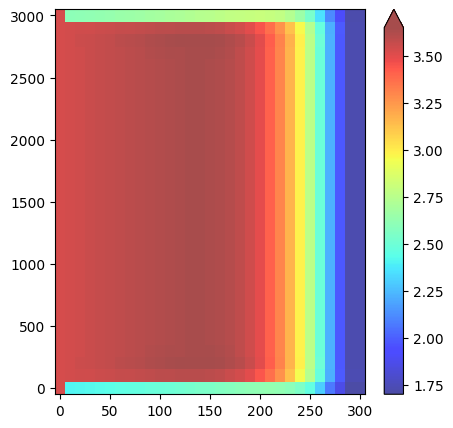

In [ ]:
plt.figure(num=1,figsize = (5,5), facecolor=None)
plt.pcolormesh(X1, Y1, Z1, cmap='jet',alpha=0.7)
plt.colorbar(extend='max')

In [ ]:
data = pd.read_csv("D:/Desktop/毕业论文/model/一维modelSWAN/test2/result1.csv")
data

In [ ]:
x = data['x'][:31]
HS = data['hs']

for i in range (len(HS)):
    if HS[i] < 0:
        HS[i] = HS[i-1]

In [ ]:
for  i in range (31):
    for j in range (31):
        Z1[i,j] = HS[i*31+j]
   

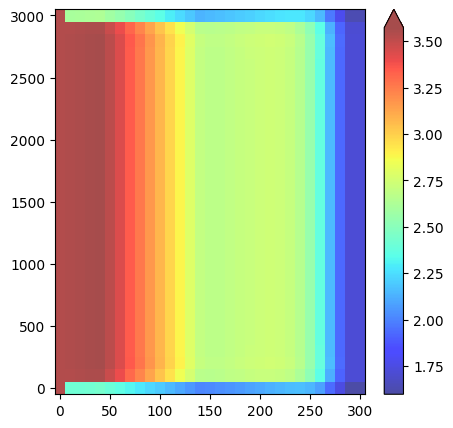

In [ ]:
plt.figure(num=1,figsize = (5,5), facecolor=None)
plt.pcolormesh(X1, Y1, Z1, cmap='jet',alpha=0.7)
plt.colorbar(extend='max')

## 4.4植被水域波浪传播模拟分析

### 4.4.1	植被特征参数 ah

#### 无植被

In [3]:
data = pd.read_csv("D:/Desktop/毕业论文/model/一维modelSWAN/植被参数/result0.csv")
data

,Xp,Yp,Hsig,Depth,Botlev
0,0,0,5.00019,11.20,11.20
1,10,0,3.40313,10.95,10.95
2,20,0,3.41112,10.70,10.70
3,30,0,3.41957,10.44,10.44
4,40,0,3.42800,10.18,10.18
...,...,...,...,...,...
956,260,3000,2.47046,2.92,2.92
957,270,3000,2.22369,2.41,2.41
958,280,3000,2.00697,1.84,1.84
959,290,3000,1.77408,1.16,1.16


In [4]:
x0 = data['Xp'][:31]
HS0 = data['Hsig']
Depth0 = data['Depth']

In [6]:
# 特征处理
for i in range (len(HS0)):
    if HS0[i] < 0:
        HS0[i] = HS0[i-1]
    if Depth0[i] < 0:
        Depth0[i] = Depth0[i-1]

In [7]:
# 通用参数
nx=31
ny=31
lenX = 300
lenY = 3000

x1 = np.linspace(0,lenX, nx)
y1 = np.linspace(0,lenY, ny)
x1,y1

(array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.,
        110., 120., 130., 140., 150., 160., 170., 180., 190., 200., 210.,
        220., 230., 240., 250., 260., 270., 280., 290., 300.]),
 array([   0.,  100.,  200.,  300.,  400.,  500.,  600.,  700.,  800.,
         900., 1000., 1100., 1200., 1300., 1400., 1500., 1600., 1700.,
        1800., 1900., 2000., 2100., 2200., 2300., 2400., 2500., 2600.,
        2700., 2800., 2900., 3000.]))

In [8]:
X1, Y1 = np.meshgrid(x1, y1)
X1.shape, Y1.shape

((31, 31), (31, 31))

In [9]:
Z0_Hs=(np.zeros(nx*ny).reshape(nx,ny))
Z0_Depth=(np.zeros(nx*ny).reshape(nx,ny))
Z0_Hs.shape

(31, 31)

In [10]:
for  i in range (31):
    for j in range (31):
        Z0_Hs[i,j] = HS0[i*31+j]
        Z0_Depth[i,j] = Depth0[i*31+j]




for i in range (31):
    for j in range (31):
        if i == 0:
            Z0_Hs[i,j] = Z0_Hs[i+1,j]
        if i == 30:
            Z0_Hs[i,j] = Z0_Hs[i-1,j]

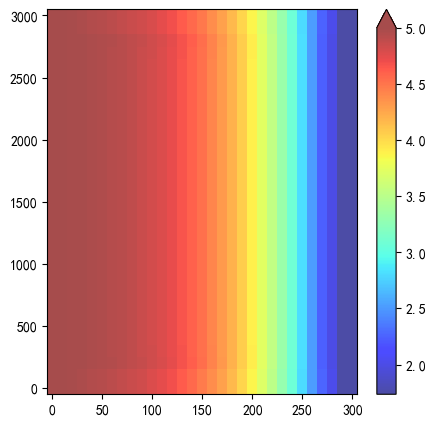

In [11]:
plt.figure(num=1,figsize = (5,5), facecolor=None)
plt.pcolormesh(X1, Y1, Z0_Hs, cmap='jet',alpha=0.7)
plt.colorbar(extend='max')

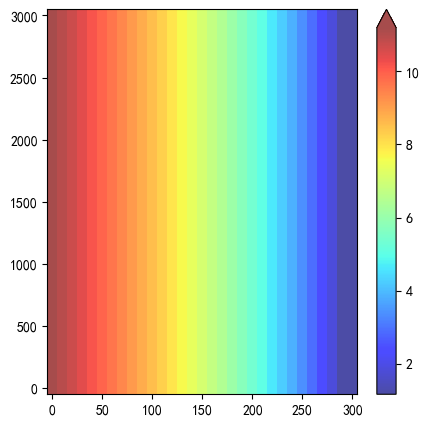

In [87]:
plt.figure(num=1,figsize = (5,5), facecolor=None)
plt.pcolormesh(X1, Y1, Z0_Depth, cmap='jet',alpha=0.7)
plt.colorbar(extend='max')

#### 植被高度=1

In [117]:
data = pd.read_csv("D:/Desktop/毕业论文/model/一维modelSWAN/植被参数/result1.csv")
data

,Xp,Yp,Hsig
0,0,0,5.00019
1,10,0,3.40313
2,20,0,3.41112
3,30,0,3.41957
4,40,0,3.42800
...,...,...,...
956,260,3000,2.34873
957,270,3000,2.11453
958,280,3000,1.90879
959,290,3000,1.72348


In [118]:
x1 = data['Xp'][:31]
HS1 = data['Hsig']

In [120]:
for i in range (len(HS0)):
    if HS1[i] < 0:
        HS1[i] = HS1[i-1]


In [121]:
Z1_Hs=(np.zeros(nx*ny).reshape(nx,ny))

In [122]:
for  i in range (31):
    for j in range (31):
        Z1_Hs[i,j] = HS1[i*31+j]



for i in range (31):
    for j in range (31):
        if i == 0:
            Z1_Hs[i,j] = Z1_Hs[i+1,j]
        if i == 30:
            Z1_Hs[i,j] = Z1_Hs[i-1,j]

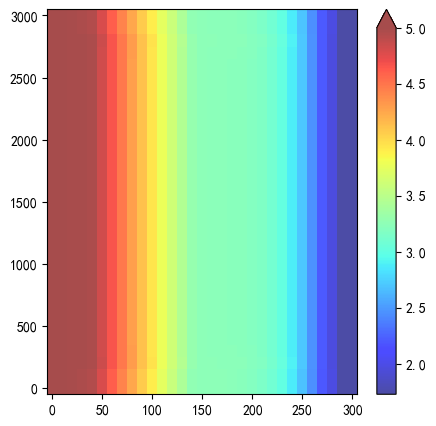

In [123]:
plt.figure(num=1,figsize = (5,5), facecolor=None)
plt.pcolormesh(X1, Y1, Z1_Hs, cmap='jet',alpha=0.7)
plt.colorbar(extend='max')

#### 植被高度=3

In [97]:
data = pd.read_csv("D:/Desktop/毕业论文/model/一维modelSWAN/植被参数/result3.csv")


x3 = data['Xp'][:31]
HS3 = data['Hsig']

In [99]:
for i in range (len(HS3)):
    if HS3[i] < 0:
        HS3[i] = HS3[i-1]

Z3_Hs=(np.zeros(nx*ny).reshape(nx,ny))

In [100]:
for  i in range (31):
    for j in range (31):
        Z3_Hs[i,j] = HS3[i*31+j]


for i in range (31):
    for j in range (31):
        if i == 0:
            Z3_Hs[i,j] = Z3_Hs[i+1,j]
        if i == 30:
            Z3_Hs[i,j] = Z3_Hs[i-1,j]


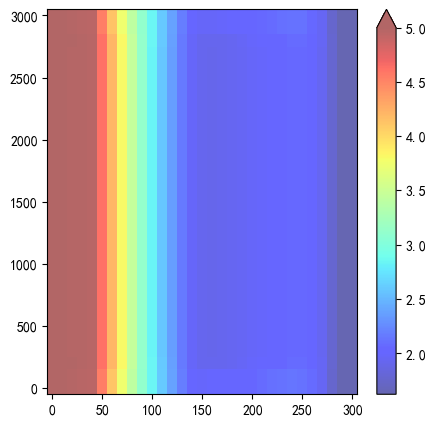

In [101]:
plt.figure(num=1,figsize = (5,5), facecolor=None)
plt.pcolormesh(X1, Y1, Z3_Hs, cmap='jet',alpha=0.6)
plt.colorbar(extend='max')

#### 植被高度=5

In [22]:
data = pd.read_csv("D:/Desktop/毕业论文/model/一维modelSWAN/植被参数/result5.csv")


x5 = data['Xp'][:31]
HS5 = data['Hsig']

In [ ]:
for i in range (len(HS5)):
    if HS5[i] < 0:
        HS5[i] = HS5[i-1]


In [24]:
Z5_Hs=(np.zeros(nx*ny).reshape(nx,ny))

In [25]:
for  i in range (31):
    for j in range (31):
        Z5_Hs[i,j] = HS5[i*31+j]


for i in range (31):
    for j in range (31):
        if i == 0:
            Z5_Hs[i,j] = Z5_Hs[i+1,j]
        if i == 30:
            Z5_Hs[i,j] = Z5_Hs[i-1,j]


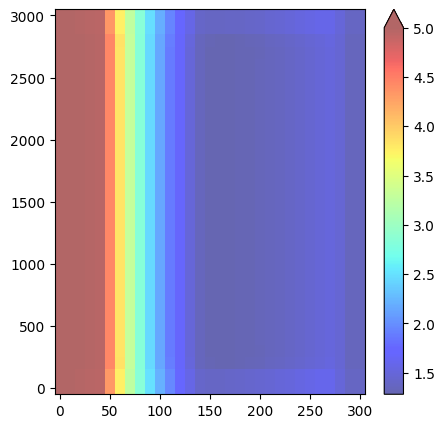

In [26]:
plt.figure(num=1,figsize = (5,5), facecolor=None)
plt.pcolormesh(X1, Y1, Z5_Hs, cmap='jet',alpha=0.6)
plt.colorbar(extend='max')

#### 植被高度=7


In [104]:
data = pd.read_csv("D:/Desktop/毕业论文/model/一维modelSWAN/植被参数/result7.csv")


x7 = data['Xp'][:31]
HS7 = data['Hsig']

In [106]:
for i in range (len(HS7)):
    if HS7[i] < 0:
        HS7[i] = HS7[i-1]

Z7_Hs=(np.zeros(nx*ny).reshape(nx,ny))

In [107]:
for  i in range (31):
    for j in range (31):
        Z7_Hs[i,j] = HS7[i*31+j]


for i in range (31):
    for j in range (31):
        if i == 0:
            Z7_Hs[i,j] = Z7_Hs[i+1,j]
        if i == 30:
            Z7_Hs[i,j] = Z7_Hs[i-1,j]


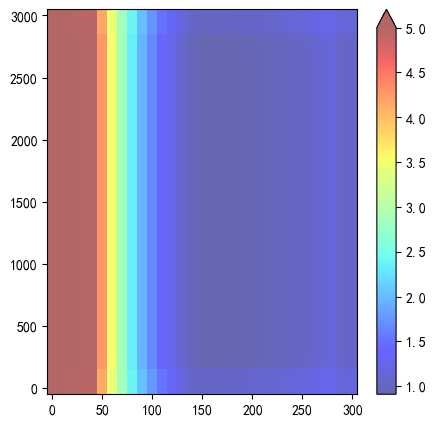

In [108]:
plt.figure(num=1,figsize = (5,5), facecolor=None)
plt.pcolormesh(X1, Y1, Z7_Hs, cmap='jet',alpha=0.6)
plt.colorbar(extend='max')

#### 植被高度=9

In [134]:
data = pd.read_csv("D:/Desktop/毕业论文/model/一维modelSWAN/植被参数/result9.csv")


x9 = data['Xp'][:31]
HS9 = data['Hsig']

In [136]:
for i in range (len(HS9)):
    if HS9[i] < 0:
        HS9[i] = HS9[i-1]
        
Z9_Hs=(np.zeros(nx*ny).reshape(nx,ny))

In [137]:
for  i in range (31):
    for j in range (31):
        Z9_Hs[i,j] = HS9[i*31+j]


for i in range (31):
    for j in range (31):
        if i == 0:
            Z9_Hs[i,j] = Z9_Hs[i+1,j]
        if i == 30:
            Z9_Hs[i,j] = Z9_Hs[i-1,j]


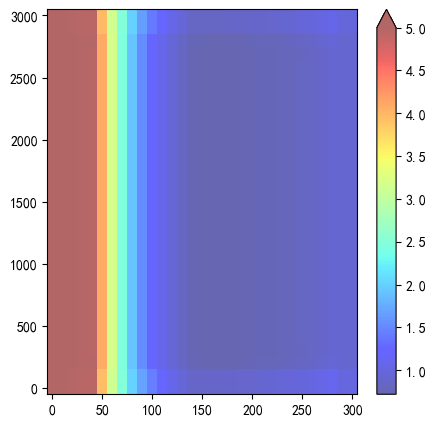

In [138]:
plt.figure(num=1,figsize = (5,5), facecolor=None)
plt.pcolormesh(X1, Y1, Z9_Hs, cmap='jet',alpha=0.6)
plt.colorbar(extend='max')

#### 植被高度=10

In [35]:
data = pd.read_csv("D:/Desktop/毕业论文/model/一维modelSWAN/植被参数/result10.csv")


x10 = data['Xp'][:31]
HS10 = data['Hsig']

In [ ]:
for i in range (len(HS10)):
    if HS10[i] < 0:
        HS10[i] = HS10[i-1]
        
Z10_Hs=(np.zeros(nx*ny).reshape(nx,ny))

In [38]:
for  i in range (31):
    for j in range (31):
        Z10_Hs[i,j] = HS10[i*31+j]


for i in range (31):
    for j in range (31):
        if i == 0:
            Z10_Hs[i,j] = Z10_Hs[i+1,j]
        if i == 30:
            Z10_Hs[i,j] = Z10_Hs[i-1,j]


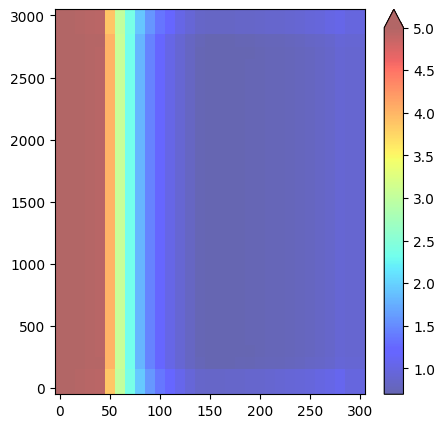

In [31]:
plt.figure(num=1,figsize = (5,5), facecolor=None)
plt.pcolormesh(X1, Y1, Z10_Hs, cmap='jet',alpha=0.6)
plt.colorbar(extend='max')

#### 植被高度=12

In [39]:
data = pd.read_csv("D:/Desktop/毕业论文/model/一维modelSWAN/植被参数/result12.csv")


x12 = data['Xp'][:31]
HS12 = data['Hsig']

In [57]:
for i in range (len(HS12)):
    if HS12[i] < 0:
        HS12[i] = HS12[i-1]-0.5


In [58]:
Z12_Hs=(np.zeros(nx*ny).reshape(nx,ny))

In [59]:
for  i in range (31):
    for j in range (31):
        Z12_Hs[i,j] = HS12[i*31+j]


for i in range (31):
    for j in range (31):
        if i == 0:
            Z12_Hs[i,j] = Z12_Hs[i+1,j]
        if i == 30:
            Z12_Hs[i,j] = Z12_Hs[i-1,j]


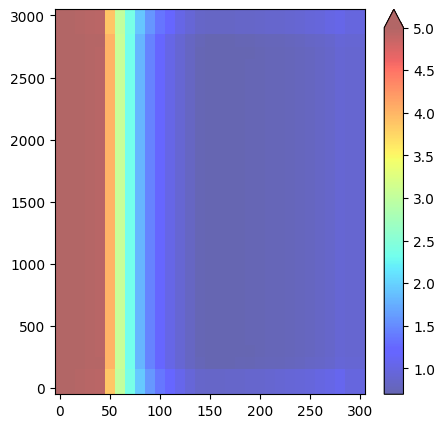

In [60]:
plt.figure(num=1,figsize = (5,5), facecolor=None)
plt.pcolormesh(X1, Y1, Z12_Hs, cmap='jet',alpha=0.6)
plt.colorbar(extend='max')

#### 植被高度变化与波高关系图

##### 断面图

In [61]:
Z0_Hs[15,:].shape

(31,)

In [62]:
X1.shape,Z12_Hs[15,:].shape

((31, 31), (31,))

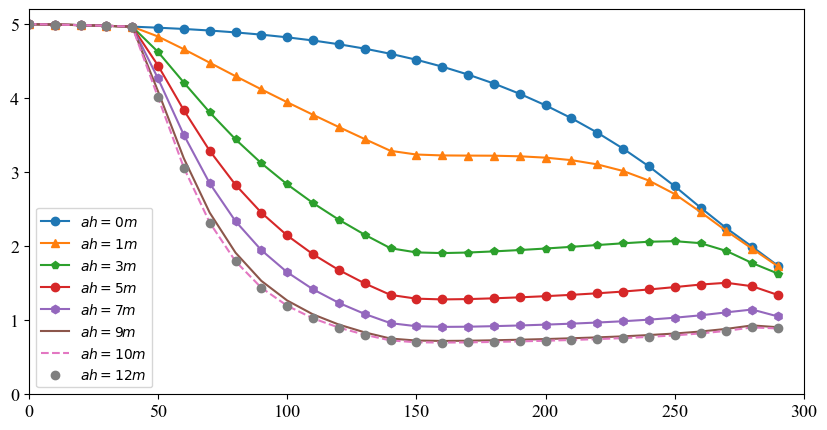

In [163]:
plt.figure(num=5,figsize = (10,5), facecolor=None)
plt.plot(X1[15,:][:-1],Z0_Hs[15,:][:-1], '-o', label = '$ah=0m$',)
plt.plot(X1[15,:][:-1],Z1_Hs[15,:][:-1], '-^', label = '$ah=1m$')
plt.plot(X1[15,:][:-1],Z3_Hs[15,:][:-1], '-p', label = '$ah=3m$')
plt.plot(X1[15,:][:-1],Z5_Hs[15,:][:-1], '-o', label = '$ah=5m$')
plt.plot(X1[15,:][:-1],Z7_Hs[15,:][:-1], '-h', label = '$ah=7m$')
plt.plot(X1[15,:][:-1],Z9_Hs[15,:][:-1], label = '$ah=9m$')
plt.plot(X1[15,:][:-1],Z10_Hs[15,:][:-1],'--',label = '$ah=10m$')
plt.plot(X1[15,:][:-1],Z12_Hs[15,:][:-1],'o',label = '$ah=12m$')

plt.xlim(0,300)
plt.ylim(0,5.2)
plt.xticks([0,50,100,150,200,250,300],fontproperties = 'Times New Roman',size = 13)
plt.yticks([0,1,2,3,4,5],fontproperties = 'Times New Roman',size = 13)

plt.legend()


In [168]:
Z0_Hs[15,:].shape,X1[15,:],X1[15,15],Z0_Hs[15,15]

((31,),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.,
        110., 120., 130., 140., 150., 160., 170., 180., 190., 200., 210.,
        220., 230., 240., 250., 260., 270., 280., 290., 300.]),
 150.0,
 4.51835)

##### 关系图

In [176]:
x1 = np.array([0,1,3,5,7,9,10,12,13])
y1 = np.array([Z0_Hs[15,15],Z1_Hs[15,15],Z3_Hs[15,15],Z5_Hs[15,15],Z7_Hs[15,15],Z9_Hs[15,15],Z10_Hs[15,15],Z12_Hs[15,15],Z12_Hs[15,15]])
y1

array([4.51835, 3.23826, 1.9161 , 1.2916 , 0.91939, 0.72567, 0.70266,
       0.70266, 0.70266])

(0.0, 5.2)

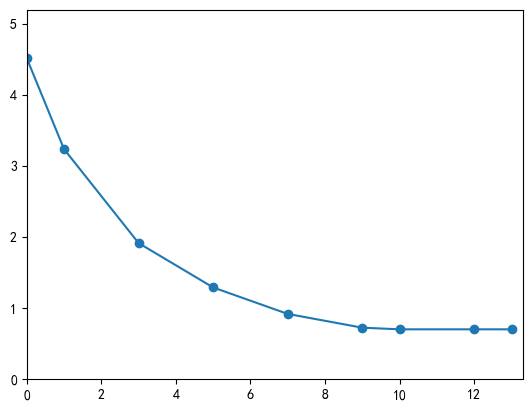

In [181]:
plt.plot(x1,y1,'-o')
plt.xlim(0,13.3)
plt.ylim(0,5.2)

##### 两者综合

In [78]:
x80 = np.array([0,300])
y80 = np.array([1,1])


In [242]:
yK = (5-y1)/5 * 100
yK

array([ 9.633 , 35.2348, 61.678 , 74.168 , 81.6122, 85.4866, 85.9468,
       85.9468, 85.9468])

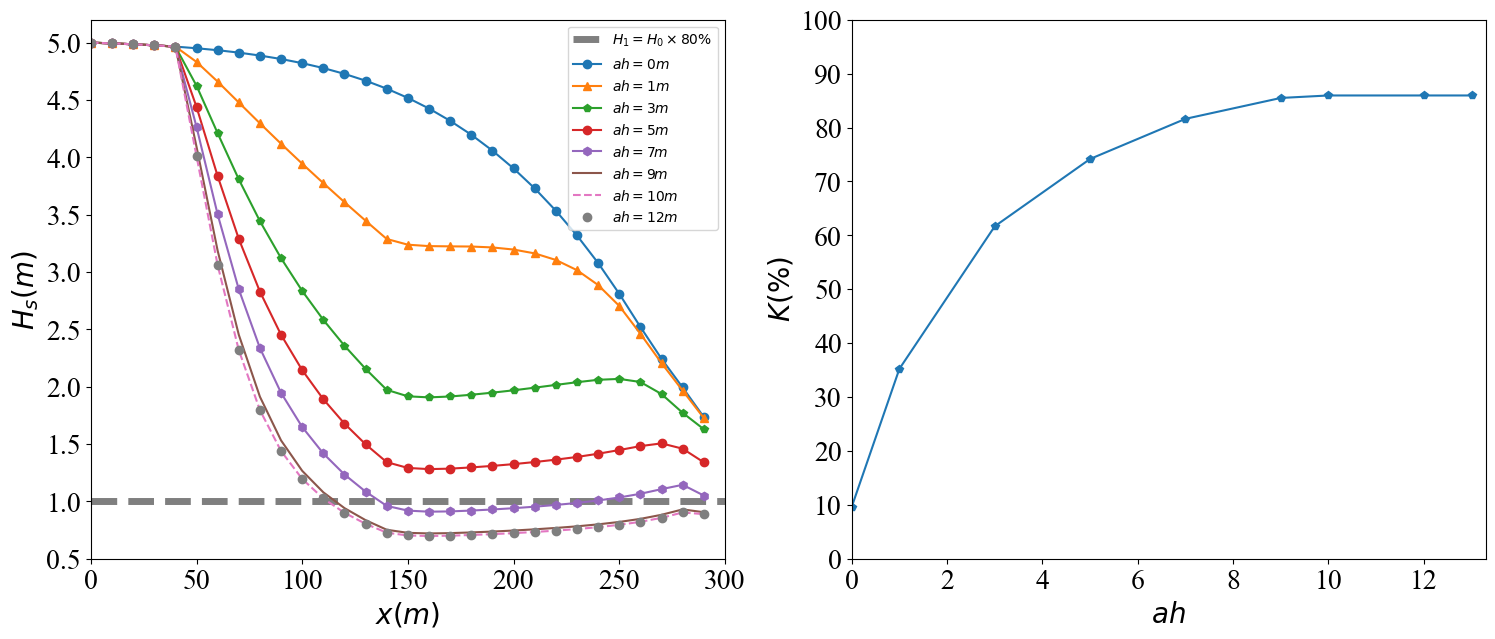

In [246]:
plt.figure(num=6,figsize = (18,7), facecolor=None)
plt.subplot(121)
plt.plot(x80,y80,'--',color='k',alpha=0.5,lw=5,label='$H_1=H_0\\times80\%$')
plt.plot(X1[15,:][:-1],Z0_Hs[15,:][:-1], '-o', label = '$ah=0m$',)
plt.plot(X1[15,:][:-1],Z1_Hs[15,:][:-1], '-^', label = '$ah=1m$')
plt.plot(X1[15,:][:-1],Z3_Hs[15,:][:-1], '-p', label = '$ah=3m$')
plt.plot(X1[15,:][:-1],Z5_Hs[15,:][:-1], '-o', label = '$ah=5m$')
plt.plot(X1[15,:][:-1],Z7_Hs[15,:][:-1], '-h', label = '$ah=7m$')
plt.plot(X1[15,:][:-1],Z9_Hs[15,:][:-1], label = '$ah=9m$')
plt.plot(X1[15,:][:-1],Z10_Hs[15,:][:-1],'--',label = '$ah=10m$')
plt.plot(X1[15,:][:-1],Z12_Hs[15,:][:-1],'o',label = '$ah=12m$')


plt.xlabel('$x(m)$', fontsize=20) 
plt.ylabel('$H_s(m)$', fontsize=20)
plt.xlim(0,300)
plt.ylim(0.5,5.2)
plt.xticks([0,50,100,150,200,250,300],fontproperties = 'Times New Roman',size = 20)
plt.yticks([0.5,1,1.5,2,2.5,3,3.5,4,4.5,5],fontproperties = 'Times New Roman',size = 20)

plt.legend(fontsize=10)

plt.subplot(122)
plt.plot(x1,yK,'-p')
plt.xlim(0,13.3)
plt.ylim(0,100)
plt.xticks([0,2,4,6,8,10,12],fontproperties = 'Times New Roman',size = 20)
plt.yticks([0,10,20,30,40,50,60,70,80,90,100],fontproperties = 'Times New Roman',size = 20)
plt.xlabel('$ah$', fontsize=20) 
plt.ylabel('$K(\%)$', fontsize=20)

plt.savefig('modelData/植被高度变化与波高关系图1.png',dpi=500,bbox_inches='tight')

In [231]:
'''计算消波率'''
y1

array([4.51835, 3.23826, 1.9161 , 1.2916 , 0.91939, 0.72567, 0.70266,
       0.70266, 0.70266])

In [236]:
yK = (5-y1)/5
yK

array([0.09633 , 0.352348, 0.61678 , 0.74168 , 0.816122, 0.854866,
       0.859468, 0.859468, 0.859468])

### 4.4.2	植被特征参数 植被密度

##### 植被密度=3


In [110]:
data = pd.read_csv("D:/Desktop/毕业论文/model/一维modelSWAN/植被密度影响/result3.csv")

data

,Xp,Yp,Hsig
0,0,0,5.00019
1,10,0,3.40313
2,20,0,3.41112
3,30,0,3.41957
4,40,0,3.42800
...,...,...,...
956,260,3000,2.25728
957,270,3000,2.03726
958,280,3000,1.83896
959,290,3000,1.68413


In [111]:
x33 = data['Xp'][:31]
HS33 = data['Hsig']

In [113]:
for i in range (len(HS33)):
    if HS33[i] < 0:
        HS33[i] = HS33[i-1]-0.5

Z33_Hs=(np.zeros(nx*ny).reshape(nx,ny))

In [114]:
for  i in range (31):
    for j in range (31):
        Z33_Hs[i,j] = HS33[i*31+j]


for i in range (31):
    for j in range (31):
        if i == 0:
            Z33_Hs[i,j] = Z33_Hs[i+1,j]
        if i == 30:
            Z33_Hs[i,j] = Z33_Hs[i-1,j]


#### 植被密度=10

In [49]:
data = pd.read_csv("D:/Desktop/毕业论文/model/一维modelSWAN/植被密度影响/result10.csv")

data

,Xp,Yp,Hsig
0,0,0,5.00019
1,10,0,3.40313
2,20,0,3.41112
3,30,0,3.41957
4,40,0,3.42800
...,...,...,...
956,260,3000,2.25728
957,270,3000,2.03726
958,280,3000,1.83896
959,290,3000,1.68413


In [50]:
x10 = data['Xp'][:31]
HS10 = data['Hsig']

In [52]:
for i in range (len(HS10)):
    if HS10[i] < 0:
        HS10[i] = HS10[i-1]-0.5

Z10_Hs=(np.zeros(nx*ny).reshape(nx,ny))

In [53]:
for  i in range (31):
    for j in range (31):
        Z10_Hs[i,j] = HS10[i*31+j]


for i in range (31):
    for j in range (31):
        if i == 0:
            Z10_Hs[i,j] = Z10_Hs[i+1,j]
        if i == 30:
            Z10_Hs[i,j] = Z10_Hs[i-1,j]


#### 植被密度=20

In [54]:
data = pd.read_csv("D:/Desktop/毕业论文/model/一维modelSWAN/植被密度影响/result20.csv")

data

,Xp,Yp,Hsig
0,0,0,5.00019
1,10,0,3.40313
2,20,0,3.41112
3,30,0,3.41957
4,40,0,3.42800
...,...,...,...
956,260,3000,1.94820
957,270,3000,1.84960
958,280,3000,1.67008
959,290,3000,1.53113


In [55]:
x20 = data['Xp'][:31]
HS20 = data['Hsig']

In [57]:
for i in range (len(HS20)):
    if HS20[i] < 0:
        HS20[i] = HS20[i-1]-0.5

Z20_Hs=(np.zeros(nx*ny).reshape(nx,ny))

In [58]:
for  i in range (31):
    for j in range (31):
        Z20_Hs[i,j] = HS20[i*31+j]


for i in range (31):
    for j in range (31):
        if i == 0:
            Z20_Hs[i,j] = Z20_Hs[i+1,j]
        if i == 30:
            Z20_Hs[i,j] = Z20_Hs[i-1,j]


#### 植被密度=30

In [27]:
data = pd.read_csv("D:/Desktop/毕业论文/model/一维modelSWAN/植被密度影响/result30.csv")

data

,Xp,Yp,Hsig
0,0,0,5.00019
1,10,0,3.40313
2,20,0,3.41112
3,30,0,3.41957
4,40,0,3.42800
...,...,...,...
956,260,3000,1.65616
957,270,3000,1.63750
958,280,3000,1.51073
959,290,3000,1.38416


In [28]:
x30 = data['Xp'][:31]
HS30 = data['Hsig']

In [30]:
for i in range (len(HS30)):
    if HS30[i] < 0:
        HS30[i] = HS30[i-1]-0.5

Z30_Hs=(np.zeros(nx*ny).reshape(nx,ny))

In [31]:
for  i in range (31):
    for j in range (31):
        Z30_Hs[i,j] = HS30[i*31+j]


for i in range (31):
    for j in range (31):
        if i == 0:
            Z30_Hs[i,j] = Z30_Hs[i+1,j]
        if i == 30:
            Z30_Hs[i,j] = Z30_Hs[i-1,j]


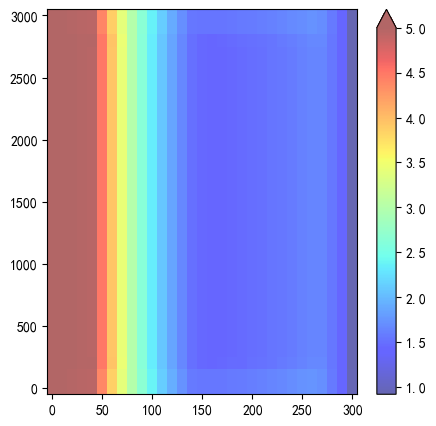

In [32]:
plt.figure(num=1,figsize = (5,5), facecolor=None)
plt.pcolormesh(X1, Y1, Z30_Hs, cmap='jet',alpha=0.6)
plt.colorbar(extend='max')

#### 植被密度=40

In [33]:
data = pd.read_csv("D:/Desktop/毕业论文/model/一维modelSWAN/植被密度影响/result40.csv")

data

,Xp,Yp,Hsig
0,0,0,5.00019
1,10,0,3.40313
2,20,0,3.41112
3,30,0,3.41957
4,40,0,3.42800
...,...,...,...
956,260,3000,1.42206
957,270,3000,1.44072
958,280,3000,1.38910
959,290,3000,1.27292


In [38]:
x40 = data['Xp'][:31]
HS40 = data['Hsig']

In [39]:
for i in range (len(HS40)):
    if HS40[i] < 0:
        HS40[i] = HS40[i-1]-0.5

Z40_Hs=(np.zeros(nx*ny).reshape(nx,ny))

In [40]:
for  i in range (31):
    for j in range (31):
        Z40_Hs[i,j] = HS40[i*31+j]


for i in range (31):
    for j in range (31):
        if i == 0:
            Z40_Hs[i,j] = Z40_Hs[i+1,j]
        if i == 30:
            Z40_Hs[i,j] = Z40_Hs[i-1,j]


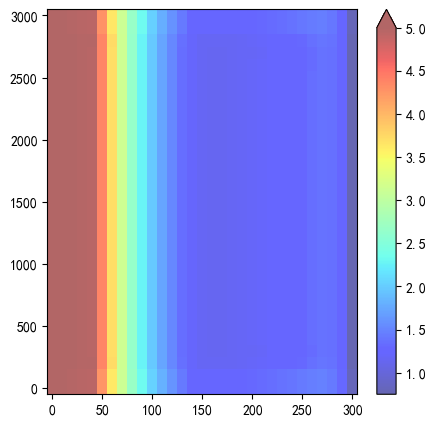

In [41]:
plt.figure(num=1,figsize = (5,5), facecolor=None)
plt.pcolormesh(X1, Y1, Z40_Hs, cmap='jet',alpha=0.6)
plt.colorbar(extend='max')

#### 植被密度=50

In [42]:
data = pd.read_csv("D:/Desktop/毕业论文/model/一维modelSWAN/植被密度影响/result50.csv")

data

,Xp,Yp,Hsig
0,0,0,5.00019
1,10,0,3.40313
2,20,0,3.41112
3,30,0,3.41957
4,40,0,3.42800
...,...,...,...
956,260,3000,1.42206
957,270,3000,1.44072
958,280,3000,1.38910
959,290,3000,1.27292


In [43]:
x50 = data['Xp'][:31]
HS50 = data['Hsig']

In [45]:
for i in range (len(HS50)):
    if HS50[i] < 0:
        HS50[i] = HS50[i-1]-0.5

Z50_Hs=(np.zeros(nx*ny).reshape(nx,ny))

In [46]:
for  i in range (31):
    for j in range (31):
        Z50_Hs[i,j] = HS50[i*31+j]


for i in range (31):
    for j in range (31):
        if i == 0:
            Z50_Hs[i,j] = Z50_Hs[i+1,j]
        if i == 30:
            Z50_Hs[i,j] = Z50_Hs[i-1,j]


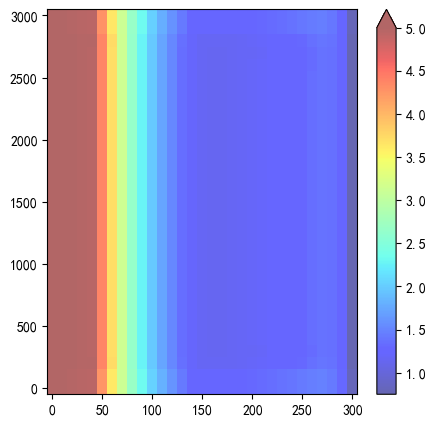

In [47]:
plt.figure(num=1,figsize = (5,5), facecolor=None)
plt.pcolormesh(X1, Y1, Z50_Hs, cmap='jet',alpha=0.6)
plt.colorbar(extend='max')

#### 植被密度变化与波高变化图

##### 断面图

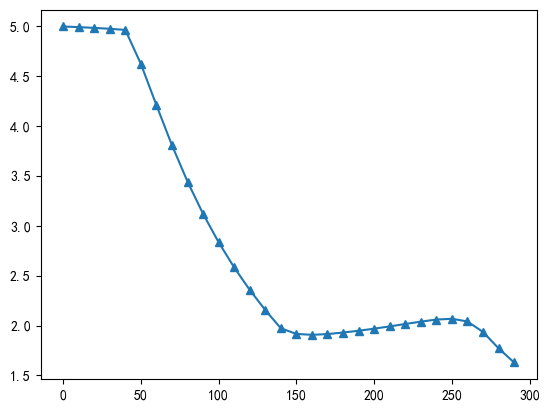

In [106]:
plt.plot(X1[15,:][:-1],Z3_Hs[15,:][:-1], '-^', label = '$\\rho=3\ units/m^2$')

([<matplotlib.axis.YTick at 0x1b7160a32b0>,
 [Text(0, 0.5, '0.5'),
  Text(0, 1.0, '1.0'),
  Text(0, 1.5, '1.5'),
  Text(0, 2.0, '2.0'),
  Text(0, 2.5, '2.5'),
  Text(0, 3.0, '3.0'),
  Text(0, 3.5, '3.5'),
  Text(0, 4.0, '4.0'),
  Text(0, 4.5, '4.5'),
  Text(0, 5.0, '5.0')])

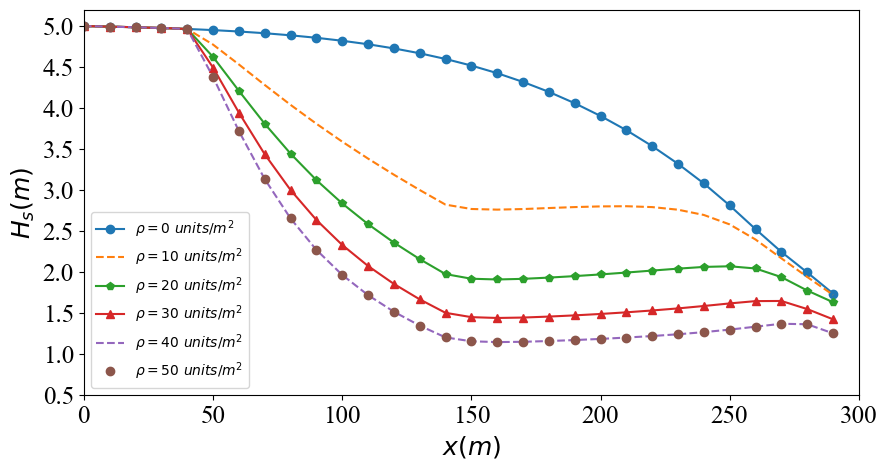

In [116]:
# 绘制断面图
plt.figure(num=5,figsize = (10,5), facecolor=None)
plt.plot(X1[15,:][:-1],Z0_Hs[15,:][:-1], '-o', label = '$\\rho=0\ units/m^2$',)
# plt.plot(X1[15,:][:-1],Z33_Hs[15,:][:-1], '-^', label = '$\\rho=3\ units/m^2$')
plt.plot(X1[15,:][:-1],Z10_Hs[15,:][:-1], '--', label = '$\\rho=10\ units/m^2$',)
plt.plot(X1[15,:][:-1],Z20_Hs[15,:][:-1], '-p', label = '$\\rho=20\ units/m^2$')
plt.plot(X1[15,:][:-1],Z30_Hs[15,:][:-1], '-^', label = '$\\rho=30\ units/m^2$')
plt.plot(X1[15,:][:-1],Z40_Hs[15,:][:-1], '--', label = '$\\rho=40\ units/m^2$')
plt.plot(X1[15,:][:-1],Z50_Hs[15,:][:-1], 'o', label = '$\\rho=50\ units/m^2$')

plt.legend(fontsize=10)

plt.xlabel('$x(m)$', fontsize=18) 
plt.ylabel('$H_s(m)$', fontsize=18)
plt.xlim(0,300)
plt.ylim(0.5,5.2)
plt.xticks([0,50,100,150,200,250,300],fontproperties = 'Times New Roman',size = 18)
plt.yticks([0.5,1,1.5,2,2.5,3,3.5,4,4.5,5],fontproperties = 'Times New Roman',size = 18)


##### 关系图

In [117]:
x1 = np.array([0,10,20,30,40,50,60]) 
y1 = np.array([Z0_Hs[15,15],Z10_Hs[15,15],Z20_Hs[15,15],Z30_Hs[15,15],Z40_Hs[15,15],Z50_Hs[15,15],Z50_Hs[15,15]])
y1

array([4.51835, 2.76739, 1.9161 , 1.44712, 1.15248, 1.15248, 1.15248])

In [118]:
yK = (5-y1)/5 * 100
yK

array([ 9.633 , 44.6522, 61.678 , 71.0576, 76.9504, 76.9504, 76.9504])

Text(0, 0.5, '$K(\\%)$')

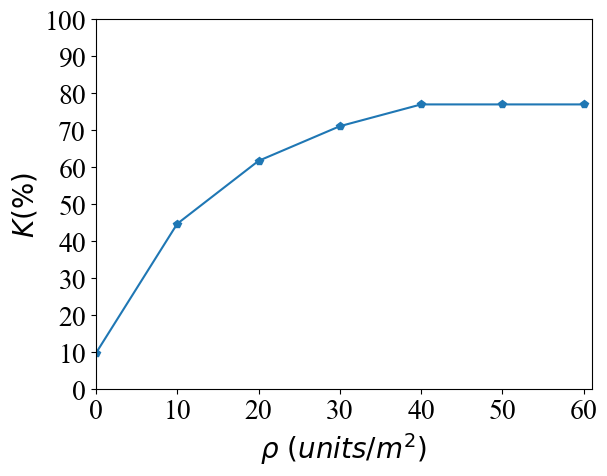

In [91]:
plt.plot(x1,yK,'-p')
plt.xlim(0,61)
plt.ylim(0,100)
plt.xticks([0,10,20,30,40,50,60],fontproperties = 'Times New Roman',size = 20)
plt.yticks([0,10,20,30,40,50,60,70,80,90,100],fontproperties = 'Times New Roman',size = 20)
plt.xlabel('$\\rho\ (units/m^2)$', fontsize=20) 
plt.ylabel('$K(\%)$', fontsize=20)

##### 两者综合

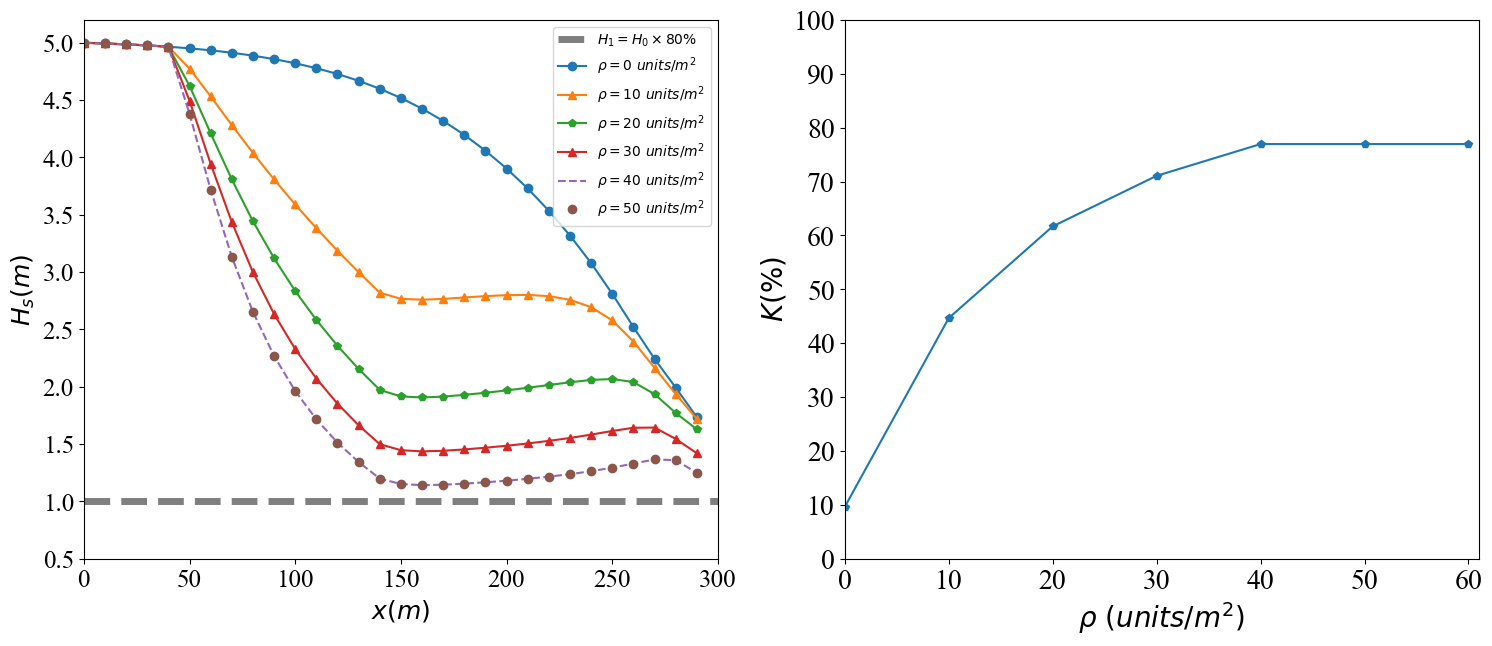

In [96]:
plt.figure(num=6,figsize = (18,7), facecolor=None)
plt.subplot(121)
# 绘制断面图
plt.plot(x80,y80,'--',color='k',alpha=0.5,lw=5,label='$H_1=H_0\\times80\%$')
plt.plot(X1[15,:][:-1],Z0_Hs[15,:][:-1], '-o', label = '$\\rho=0\ units/m^2$',)
plt.plot(X1[15,:][:-1],Z10_Hs[15,:][:-1], '-^', label = '$\\rho=10\ units/m^2$',)
plt.plot(X1[15,:][:-1],Z20_Hs[15,:][:-1], '-p', label = '$\\rho=20\ units/m^2$')
plt.plot(X1[15,:][:-1],Z30_Hs[15,:][:-1], '-^', label = '$\\rho=30\ units/m^2$')
plt.plot(X1[15,:][:-1],Z40_Hs[15,:][:-1], '--', label = '$\\rho=40\ units/m^2$')
plt.plot(X1[15,:][:-1],Z50_Hs[15,:][:-1], 'o', label = '$\\rho=50\ units/m^2$')

plt.legend(fontsize=10)

plt.xlabel('$x(m)$', fontsize=18) 
plt.ylabel('$H_s(m)$', fontsize=18)
plt.xlim(0,300)
plt.ylim(0.5,5.2)
plt.xticks([0,50,100,150,200,250,300],fontproperties = 'Times New Roman',size = 18)
plt.yticks([0.5,1,1.5,2,2.5,3,3.5,4,4.5,5],fontproperties = 'Times New Roman',size = 18)

plt.subplot(122)
plt.plot(x1,yK,'-p')
plt.xlim(0,61)
plt.ylim(0,100)
plt.xticks([0,10,20,30,40,50,60],fontproperties = 'Times New Roman',size = 20)
plt.yticks([0,10,20,30,40,50,60,70,80,90,100],fontproperties = 'Times New Roman',size = 20)
plt.xlabel('$\\rho\ (units/m^2)$', fontsize=20) 
plt.ylabel('$K(\%)$', fontsize=20)

plt.savefig('modelData/植被密度变化与波高关系图1.png',dpi=500,bbox_inches='tight')


### 不同入射波高对植被水域波高影响


#### 入射波高$h_s = 6m$

In [62]:
data = pd.read_csv("D:/Desktop/毕业论文/model/一维modelSWAN/入射波高影响/resultH6.csv")

data

,Xp,Yp,Hsig
0,0,0,6.00023
1,10,0,4.07984
2,20,0,4.08493
3,30,0,4.08987
4,40,0,4.09399
...,...,...,...
956,260,3000,2.33186
957,270,3000,2.09974
958,280,3000,1.89577
959,290,3000,1.71706


In [63]:
xH6 = data['Xp'][:31]
HSH6 = data['Hsig']

In [65]:
for i in range (len(HSH6)):
    if HSH6[i] < 0:
        HSH6[i] = HSH6[i-1]-0.5

ZH6_Hs=(np.zeros(nx*ny).reshape(nx,ny))

In [66]:
for  i in range (31):
    for j in range (31):
        ZH6_Hs[i,j] = HSH6[i*31+j]


for i in range (31):
    for j in range (31):
        if i == 0:
            ZH6_Hs[i,j] = ZH6_Hs[i+1,j]
        if i == 30:
            ZH6_Hs[i,j] = ZH6_Hs[i-1,j]


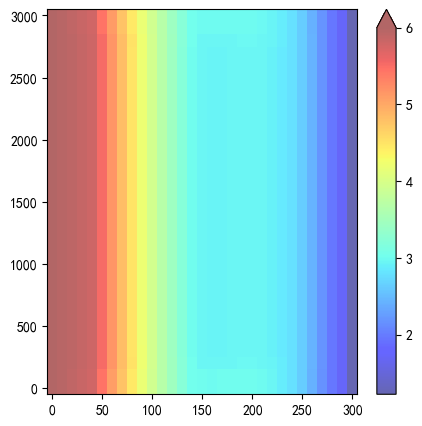

In [67]:
plt.figure(num=1,figsize = (5,5), facecolor=None)
plt.pcolormesh(X1, Y1, ZH6_Hs, cmap='jet',alpha=0.6)
plt.colorbar(extend='max')

#### 入射波高$h_s = 5m$

In [12]:
data = pd.read_csv("D:/Desktop/毕业论文/model/一维modelSWAN/入射波高影响/resultH5.csv")

data

,Xp,Yp,Hsig
0,0,0,5.00019
1,10,0,3.40313
2,20,0,3.41112
3,30,0,3.41957
4,40,0,3.42800
...,...,...,...
956,260,3000,2.25728
957,270,3000,2.03726
958,280,3000,1.83896
959,290,3000,1.68413


In [13]:
xH5 = data['Xp'][:31]
HSH5 = data['Hsig']

In [15]:
for i in range (len(HSH5)):
    if HSH5[i] < 0:
        HSH5[i] = HSH5[i-1]-0.5

ZH5_Hs=(np.zeros(nx*ny).reshape(nx,ny))

In [16]:
for  i in range (31):
    for j in range (31):
        ZH5_Hs[i,j] = HSH5[i*31+j]


for i in range (31):
    for j in range (31):
        if i == 0:
            ZH5_Hs[i,j] = ZH5_Hs[i+1,j]
        if i == 30:
            ZH5_Hs[i,j] = ZH5_Hs[i-1,j]


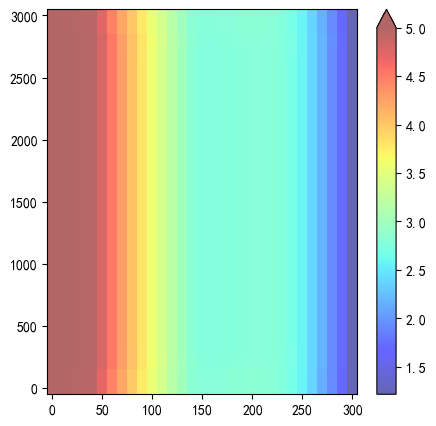

In [17]:
plt.figure(num=1,figsize = (5,5), facecolor=None)
plt.pcolormesh(X1, Y1, ZH5_Hs, cmap='jet',alpha=0.6)
plt.colorbar(extend='max')

#### 入射波高$h_s = 4.5m$

In [18]:
data = pd.read_csv("D:/Desktop/毕业论文/model/一维modelSWAN/入射波高影响/resultH45.csv")

data

,Xp,Yp,Hsig
0,0,0,4.50017
1,10,0,3.06363
2,20,0,3.07177
3,30,0,3.08048
4,40,0,3.08936
...,...,...,...
956,260,3000,2.20080
957,270,3000,2.00536
958,280,3000,1.81018
959,290,3000,1.65828


In [19]:
xH45 = data['Xp'][:31]
HSH45 = data['Hsig']

In [21]:
for i in range (len(HSH45)):
    if HSH45[i] < 0:
        HSH45[i] = HSH45[i-1]-0.5

ZH45_Hs=(np.zeros(nx*ny).reshape(nx,ny))

In [22]:
for  i in range (31):
    for j in range (31):
        ZH45_Hs[i,j] = HSH45[i*31+j]


for i in range (31):
    for j in range (31):
        if i == 0:
            ZH45_Hs[i,j] = ZH45_Hs[i+1,j]
        if i == 30:
            ZH45_Hs[i,j] = ZH45_Hs[i-1,j]


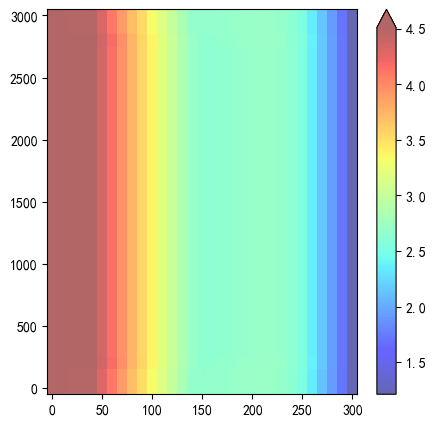

In [23]:
plt.figure(num=1,figsize = (5,5), facecolor=None)
plt.pcolormesh(X1, Y1, ZH45_Hs, cmap='jet',alpha=0.6)
plt.colorbar(extend='max')

#### 入射波高$h_s = 4m$

In [24]:
data = pd.read_csv("D:/Desktop/毕业论文/model/一维modelSWAN/入射波高影响/resultH4.csv")

data

,Xp,Yp,Hsig
0,0,0,4.00015
1,10,0,2.72369
2,20,0,2.73147
3,30,0,2.73985
4,40,0,2.74850
...,...,...,...
956,260,3000,2.12489
957,270,3000,1.96084
958,280,3000,1.76982
959,290,3000,1.62114


In [26]:
xH4 = data['Xp'][:31]
HSH4 = data['Hsig']

In [28]:
for i in range (len(HSH4)):
    if HSH4[i] < 0:
        HSH4[i] = HSH4[i-1]-0.5

ZH4_Hs=(np.zeros(nx*ny).reshape(nx,ny))

In [29]:
for  i in range (31):
    for j in range (31):
        ZH4_Hs[i,j] = HSH4[i*31+j]


for i in range (31):
    for j in range (31):
        if i == 0:
            ZH4_Hs[i,j] = ZH4_Hs[i+1,j]
        if i == 30:
            ZH4_Hs[i,j] = ZH4_Hs[i-1,j]


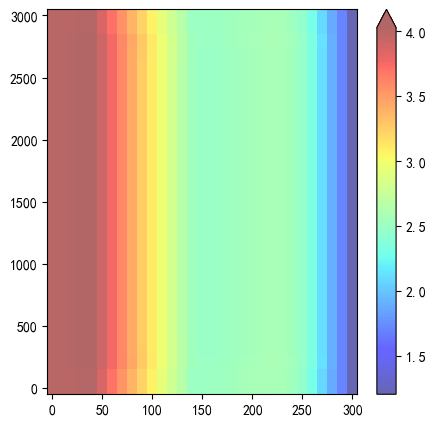

In [30]:
plt.figure(num=1,figsize = (5,5), facecolor=None)
plt.pcolormesh(X1, Y1, ZH4_Hs, cmap='jet',alpha=0.6)
plt.colorbar(extend='max')

#### 入射波高$h_s = 3.5m$

In [33]:
data = pd.read_csv("D:/Desktop/毕业论文/model/一维modelSWAN/入射波高影响/resultH35.csv")

data

,Xp,Yp,Hsig
0,0,0,3.50013
1,10,0,2.38348
2,20,0,2.39057
3,30,0,2.39825
4,40,0,2.40622
...,...,...,...
956,260,3000,2.02225
957,270,3000,1.89746
958,280,3000,1.71246
959,290,3000,1.56841


In [34]:
xH35 = data['Xp'][:31]
HSH35 = data['Hsig']

In [36]:
for i in range (len(HSH35)):
    if HSH35[i] < 0:
        HSH35[i] = HSH35[i-1]-0.5

ZH35_Hs=(np.zeros(nx*ny).reshape(nx,ny))

In [37]:
for  i in range (31):
    for j in range (31):
        ZH35_Hs[i,j] = HSH35[i*31+j]


for i in range (31):
    for j in range (31):
        if i == 0:
            ZH35_Hs[i,j] = ZH35_Hs[i+1,j]
        if i == 30:
            ZH35_Hs[i,j] = ZH35_Hs[i-1,j]


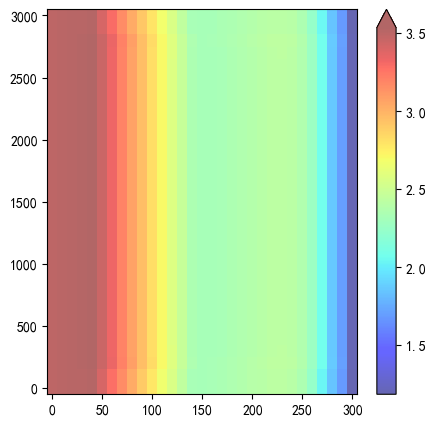

In [38]:
plt.figure(num=1,figsize = (5,5), facecolor=None)
plt.pcolormesh(X1, Y1, ZH35_Hs, cmap='jet',alpha=0.6)
plt.colorbar(extend='max')

#### 入射波高$h_s = 3m$

In [40]:
data = pd.read_csv("D:/Desktop/毕业论文/model/一维modelSWAN/入射波高影响/resultH3.csv")

data

,Xp,Yp,Hsig
0,0,0,3.00011
1,10,0,2.04310
2,20,0,2.04933
3,30,0,2.05607
4,40,0,2.06309
...,...,...,...
956,260,3000,1.88369
957,270,3000,1.80557
958,280,3000,1.62965
959,290,3000,1.49368


In [41]:
xH3 = data['Xp'][:31]
HSH3 = data['Hsig']

In [43]:
for i in range (len(HSH3)):
    if HSH3[i] < 0:
        HSH3[i] = HSH3[i-1]-0.5

ZH3_Hs=(np.zeros(nx*ny).reshape(nx,ny))

In [44]:
for  i in range (31):
    for j in range (31):
        ZH3_Hs[i,j] = HSH3[i*31+j]


for i in range (31):
    for j in range (31):
        if i == 0:
            ZH3_Hs[i,j] = ZH3_Hs[i+1,j]
        if i == 30:
            ZH3_Hs[i,j] = ZH3_Hs[i-1,j]


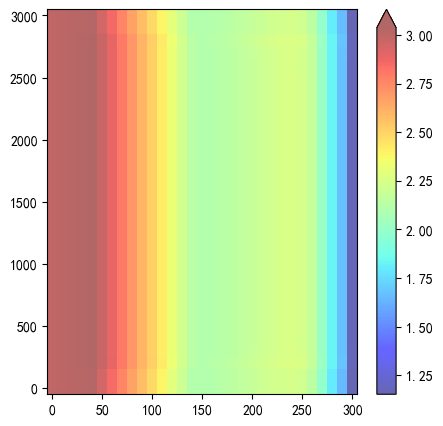

In [45]:
plt.figure(num=1,figsize = (5,5), facecolor=None)
plt.pcolormesh(X1, Y1, ZH3_Hs, cmap='jet',alpha=0.6)
plt.colorbar(extend='max')

#### 入射波高$h_s = 1.5m$

In [95]:
data = pd.read_csv("D:/Desktop/毕业论文/model/一维modelSWAN/入射波高影响/resultH15.csv")

data

,Xp,Yp,Hsig
0,0,0,1.50006
1,10,0,1.02160
2,20,0,1.02477
3,30,0,1.02821
4,40,0,1.03181
...,...,...,...
956,260,3000,1.16976
957,270,3000,1.20527
958,280,3000,1.21527
959,290,3000,1.11241


In [96]:
xH15 = data['Xp'][:31]
HSH15 = data['Hsig']

In [98]:
for i in range (len(HSH15)):
    if HSH15[i] < 0:
        HSH15[i] = HSH15[i-1]-0.5

ZH15_Hs=(np.zeros(nx*ny).reshape(nx,ny))

In [99]:
for  i in range (31):
    for j in range (31):
        ZH15_Hs[i,j] = HSH15[i*31+j]


for i in range (31):
    for j in range (31):
        if i == 0:
            ZH15_Hs[i,j] = ZH15_Hs[i+1,j]
        if i == 30:
            ZH15_Hs[i,j] = ZH15_Hs[i-1,j]


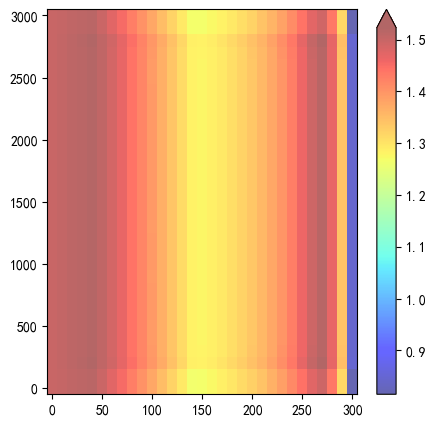

In [100]:
plt.figure(num=1,figsize = (5,5), facecolor=None)
plt.pcolormesh(X1, Y1, ZH15_Hs, cmap='jet',alpha=0.6)
plt.colorbar(extend='max')

#### 入射波高变化与波高变化图

##### 断面图

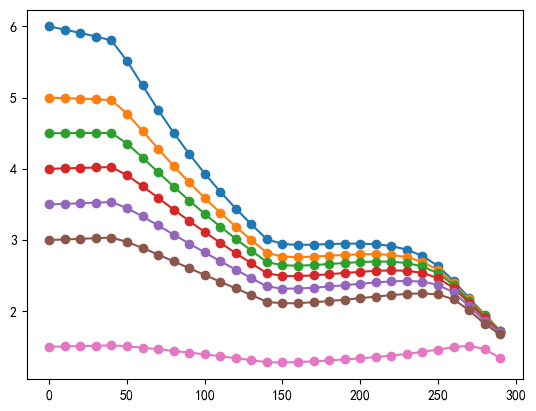

In [101]:
# plt.plot(X1[15,:][:-1],Z0_Hs[15,:][:-1], '-o', label = '$\\rho=0\ units/m^2$',)
plt.plot(X1[15,:][:-1],ZH6_Hs[15,:][:-1], '-o', label = '$\\rho=0\ units/m^2$',)
plt.plot(X1[15,:][:-1],ZH5_Hs[15,:][:-1], '-o', label = '$\\rho=0\ units/m^2$',)
plt.plot(X1[15,:][:-1],ZH45_Hs[15,:][:-1], '-o', label = '$\\rho=0\ units/m^2$',)
plt.plot(X1[15,:][:-1],ZH4_Hs[15,:][:-1], '-o', label = '$\\rho=0\ units/m^2$',)
plt.plot(X1[15,:][:-1],ZH35_Hs[15,:][:-1], '-o', label = '$\\rho=0\ units/m^2$',)
plt.plot(X1[15,:][:-1],ZH3_Hs[15,:][:-1], '-o', label = '$\\rho=0\ units/m^2$',)
plt.plot(X1[15,:][:-1],ZH15_Hs[15,:][:-1], '-o', label = '$\\rho=0\ units/m^2$',)

##### 关系图

In [103]:
x1 = np.array([1.5,3,3.5,4,4.5,5,6]) 
y1 = np.array([ZH15_Hs[15,15],ZH3_Hs[15,15],ZH35_Hs[15,15],ZH4_Hs[15,15],ZH45_Hs[15,15],ZH5_Hs[15,15],ZH6_Hs[15,15]])
y0 = np.array([ZH15_Hs[15,0],ZH3_Hs[15,0],ZH35_Hs[15,0],ZH4_Hs[15,0],ZH45_Hs[15,0],ZH5_Hs[15,0],ZH6_Hs[15,0]])
y1

array([1.27928, 2.10979, 2.31726, 2.4948 , 2.64422, 2.76739, 2.94452])

In [104]:
yK = (y0-y1)/y0 * 100
yK

array([14.71807794, 29.6762452 , 33.79503047, 37.63233879, 41.24177531,
       44.65430314, 50.92654782])

In [102]:
(ZH15_Hs[15,0]-ZH15_Hs[15,15])/ZH15_Hs[15,0]

0.14718077943548924

Text(0, 0.5, '$K(\\%)$')

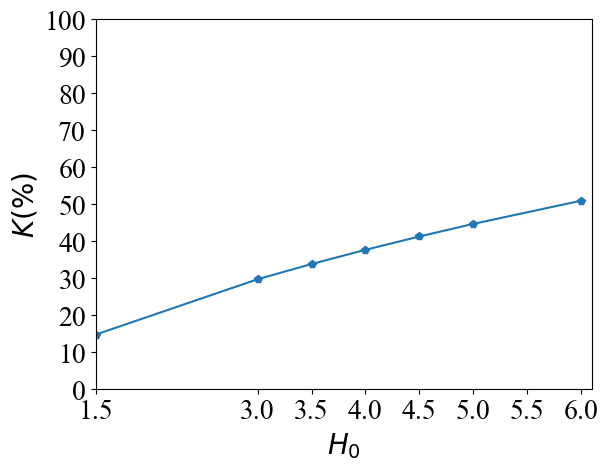

In [105]:
plt.plot(x1,yK,'-p')
plt.xlim(1.5,6.1)
plt.ylim(0,100)
plt.xticks([1.5,3,3.5,4,4.5,5,5.5,6],fontproperties = 'Times New Roman',size = 20)
plt.yticks([0,10,20,30,40,50,60,70,80,90,100],fontproperties = 'Times New Roman',size = 20)
plt.xlabel('$H_0$', fontsize=20) 
plt.ylabel('$K(\%)$', fontsize=20)

##### 两者综合

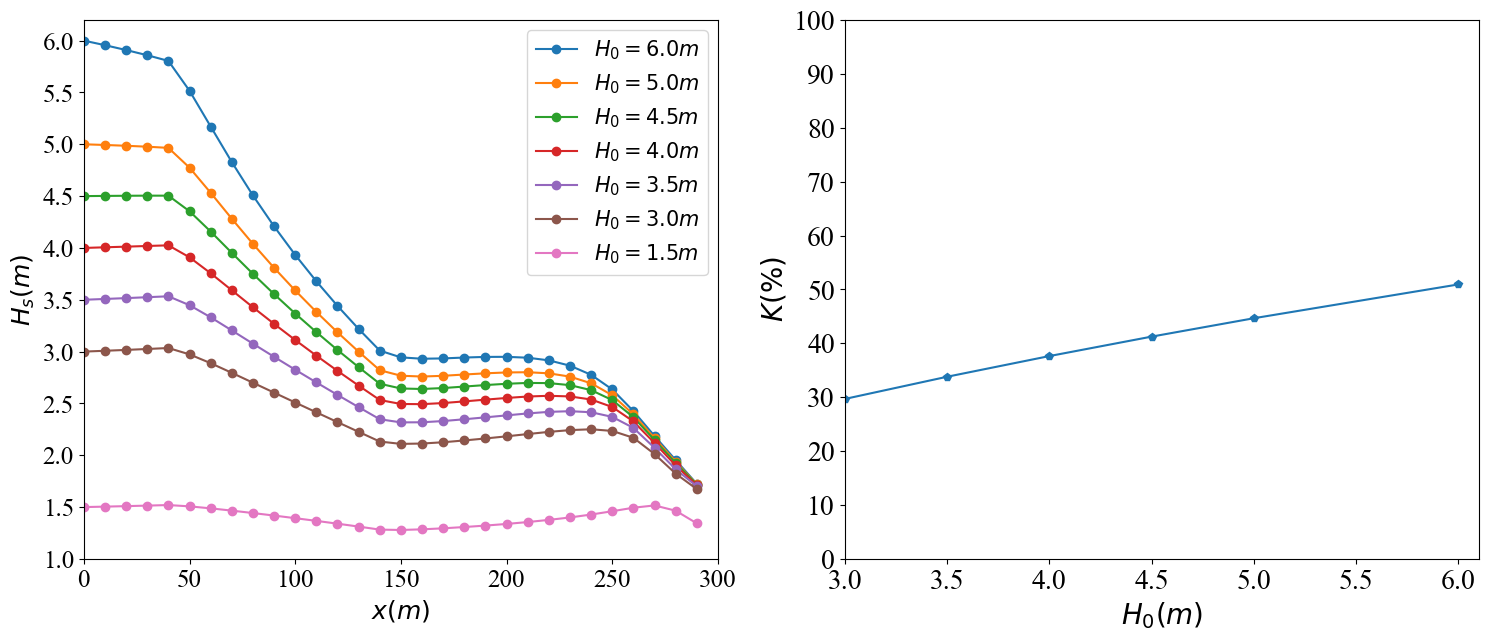

In [109]:
plt.figure(num=6,figsize = (18,7), facecolor=None)
plt.subplot(121)
# 绘制断面图
# plt.plot(x80,y80,'--',color='k',alpha=0.5,lw=5,label='$H_1=H_0\\times80\%$')
plt.plot(X1[15,:][:-1],ZH6_Hs[15,:][:-1], '-o', label = '$H_0=6.0m$',)
plt.plot(X1[15,:][:-1],ZH5_Hs[15,:][:-1], '-o', label = '$H_0=5.0m$',)
plt.plot(X1[15,:][:-1],ZH45_Hs[15,:][:-1], '-o', label = '$H_0=4.5m$',)
plt.plot(X1[15,:][:-1],ZH4_Hs[15,:][:-1], '-o', label = '$H_0=4.0m$',)
plt.plot(X1[15,:][:-1],ZH35_Hs[15,:][:-1], '-o', label = '$H_0=3.5m$',)
plt.plot(X1[15,:][:-1],ZH3_Hs[15,:][:-1], '-o', label = '$H_0=3.0m$',)
plt.plot(X1[15,:][:-1],ZH15_Hs[15,:][:-1], '-o', label = '$H_0=1.5m$',)
plt.legend(fontsize=15)

plt.xlabel('$x(m)$', fontsize=18) 
plt.ylabel('$H_s(m)$', fontsize=18)
plt.xlim(0,300)
plt.ylim(1.0,6.2)
plt.xticks([0,50,100,150,200,250,300],fontproperties = 'Times New Roman',size = 18)
plt.yticks([1.0,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6],fontproperties = 'Times New Roman',size = 18)

plt.subplot(122)
plt.plot(x1,yK,'-p')
plt.xlim(3,6.1)
plt.ylim(0,100)
plt.xticks([3,3.5,4,4.5,5,5.5,6],fontproperties = 'Times New Roman',size = 20)
plt.yticks([0,10,20,30,40,50,60,70,80,90,100],fontproperties = 'Times New Roman',size = 20)
plt.xlabel('$H_0(m)$', fontsize=20) 
plt.ylabel('$K(\%)$', fontsize=20)
plt.savefig('modelData/入射波高变化与波高关系图2.png',dpi=500,bbox_inches='tight')


### 不同谱峰周期对植被水域波高影响


#### 谱峰周期$T_p = 10$

In [168]:
data = pd.read_csv("D:/Desktop/毕业论文/model/一维modelSWAN/不同谱峰周期影响/resultTp3.csv")

data

,Xp,Yp,Hsig
0,0,0,5.00019
1,10,0,3.40313
2,20,0,3.41112
3,30,0,3.41957
4,40,0,3.42800
...,...,...,...
956,260,3000,2.25728
957,270,3000,2.03726
958,280,3000,1.83896
959,290,3000,1.68413


In [169]:
xTp3 = data['Xp'][:31]
HSTp3 = data['Hsig']

In [171]:
for i in range (len(HSTp3)):
    if HSTp3[i] < 0:
        HSTp3[i] = HSTp3[i-1]-0.5

ZHTp3_Hs=(np.zeros(nx*ny).reshape(nx,ny))

In [172]:
for  i in range (31):
    for j in range (31):
        ZHTp3_Hs[i,j] = HSTp3[i*31+j]


for i in range (31):
    for j in range (31):
        if i == 0:
            ZHTp3_Hs[i,j] = ZHTp3_Hs[i+1,j]
        if i == 30:
            ZHTp3_Hs[i,j] = ZHTp3_Hs[i-1,j]


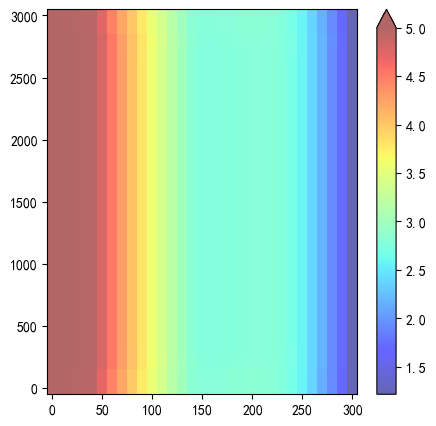

In [173]:
plt.figure(num=1,figsize = (5,5), facecolor=None)
plt.pcolormesh(X1, Y1, ZHTp3_Hs, cmap='jet',alpha=0.6)
plt.colorbar(extend='max')

#### 谱峰周期$T_p = 12$

In [195]:
data = pd.read_csv("D:/Desktop/毕业论文/model/一维modelSWAN/不同谱峰周期影响/resultTp20.csv")

data

,Xp,Yp,Hsig
0,0,0,5.00019
1,10,0,3.40313
2,20,0,3.41112
3,30,0,3.41957
4,40,0,3.42800
...,...,...,...
956,260,3000,2.16851
957,270,3000,1.98681
958,280,3000,1.79361
959,290,3000,1.64328


In [196]:
xTp10 = data['Xp'][:31]
HSTp10 = data['Hsig']

In [198]:
for i in range (len(HSTp10)):
    if HSTp10[i] < 0:
        HSTp10[i] = HSTp10[i-1]-0.5

ZHTp10_Hs=(np.zeros(nx*ny).reshape(nx,ny))

In [199]:
for  i in range (31):
    for j in range (31):
        ZHTp10_Hs[i,j] = HSTp10[i*31+j]


for i in range (31):
    for j in range (31):
        if i == 0:
            ZHTp10_Hs[i,j] = ZHTp10_Hs[i+1,j]
        if i == 30:
            ZHTp10_Hs[i,j] = ZHTp10_Hs[i-1,j]


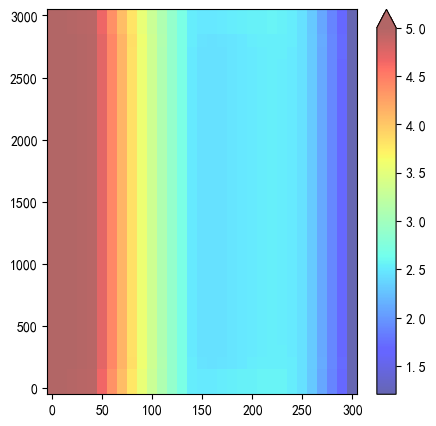

In [200]:
plt.figure(num=1,figsize = (5,5), facecolor=None)
plt.pcolormesh(X1, Y1, ZHTp10_Hs, cmap='jet',alpha=0.6)
plt.colorbar(extend='max')

#### 谱峰周期$T_p = 14$

In [202]:
data = pd.read_csv("D:/Desktop/毕业论文/model/一维modelSWAN/不同谱峰周期影响/resultTp30.csv")

data

,Xp,Yp,Hsig
0,0,0,5.00019
1,10,0,3.40313
2,20,0,3.41112
3,30,0,3.41957
4,40,0,3.42800
...,...,...,...
956,260,3000,2.07480
957,270,3000,1.93064
958,280,3000,1.74293
959,290,3000,1.59680


In [203]:
xTp14 = data['Xp'][:31]
HSTp14 = data['Hsig']

In [205]:
for i in range (len(HSTp14)):
    if HSTp14[i] < 0:
        HSTp14[i] = HSTp14[i-1]-0.5

ZHTp14_Hs=(np.zeros(nx*ny).reshape(nx,ny))

In [206]:
for  i in range (31):
    for j in range (31):
        ZHTp14_Hs[i,j] = HSTp14[i*31+j]


for i in range (31):
    for j in range (31):
        if i == 0:
            ZHTp14_Hs[i,j] = ZHTp14_Hs[i+1,j]
        if i == 30:
            ZHTp14_Hs[i,j] = ZHTp14_Hs[i-1,j]


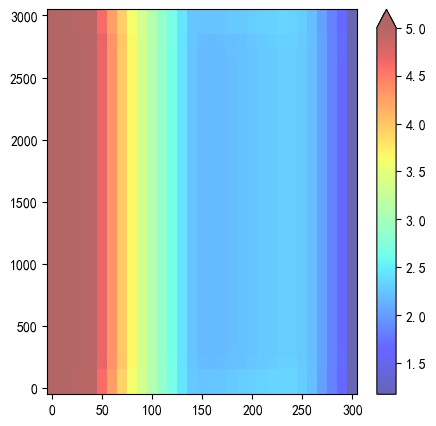

In [207]:
plt.figure(num=1,figsize = (5,5), facecolor=None)
plt.pcolormesh(X1, Y1, ZHTp14_Hs, cmap='jet',alpha=0.6)
plt.colorbar(extend='max')

#### 谱峰周期$T_p = 16$

In [209]:
data = pd.read_csv("D:/Desktop/毕业论文/model/一维modelSWAN/不同谱峰周期影响/resultTp40.csv")

data

,Xp,Yp,Hsig
0,0,0,5.00019
1,10,0,3.40313
2,20,0,3.41112
3,30,0,3.41957
4,40,0,3.42800
...,...,...,...
956,260,3000,1.97970
957,270,3000,1.87034
958,280,3000,1.68879
959,290,3000,1.54822


In [210]:
xTp16 = data['Xp'][:31]
HSTp16 = data['Hsig']

In [212]:
for i in range (len(HSTp16)):
    if HSTp16[i] < 0:
        HSTp16[i] = HSTp16[i-1]-0.5

ZHTp16_Hs=(np.zeros(nx*ny).reshape(nx,ny))

In [213]:
for  i in range (31):
    for j in range (31):
        ZHTp16_Hs[i,j] = HSTp16[i*31+j]


for i in range (31):
    for j in range (31):
        if i == 0:
            ZHTp16_Hs[i,j] = ZHTp16_Hs[i+1,j]
        if i == 30:
            ZHTp16_Hs[i,j] = ZHTp16_Hs[i-1,j]


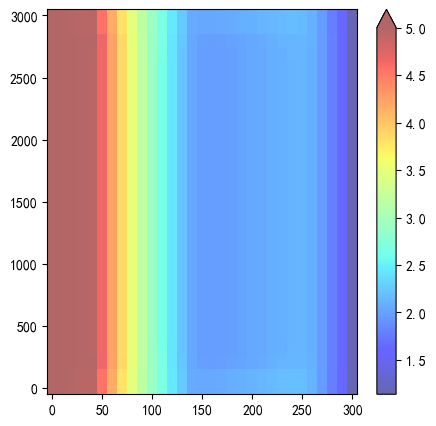

In [214]:
plt.figure(num=1,figsize = (5,5), facecolor=None)
plt.pcolormesh(X1, Y1, ZHTp16_Hs, cmap='jet',alpha=0.6)
plt.colorbar(extend='max')

#### 谱峰周期$T_p = 18$

In [217]:
data = pd.read_csv("D:/Desktop/毕业论文/model/一维modelSWAN/不同谱峰周期影响/resultTp50.csv")

data

,Xp,Yp,Hsig
0,0,0,5.00019
1,10,0,3.40313
2,20,0,3.41112
3,30,0,3.41957
4,40,0,3.42800
...,...,...,...
956,260,3000,1.94820
957,270,3000,1.84960
958,280,3000,1.67008
959,290,3000,1.53113


In [218]:
xTp18 = data['Xp'][:31]
HSTp18 = data['Hsig']

In [220]:
for i in range (len(HSTp18)):
    if HSTp18[i] < 0:
        HSTp18[i] = HSTp18[i-1]-0.5

ZHTp18_Hs=(np.zeros(nx*ny).reshape(nx,ny))

In [221]:
for  i in range (31):
    for j in range (31):
        ZHTp18_Hs[i,j] = HSTp18[i*31+j]


for i in range (31):
    for j in range (31):
        if i == 0:
            ZHTp18_Hs[i,j] = ZHTp18_Hs[i+1,j]
        if i == 30:
            ZHTp18_Hs[i,j] = ZHTp18_Hs[i-1,j]


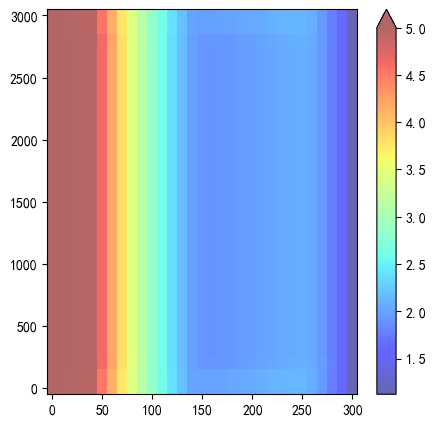

In [222]:
plt.figure(num=1,figsize = (5,5), facecolor=None)
plt.pcolormesh(X1, Y1, ZHTp18_Hs, cmap='jet',alpha=0.6)
plt.colorbar(extend='max')

#### 谱峰周期变化与波高变化图

##### 断面图

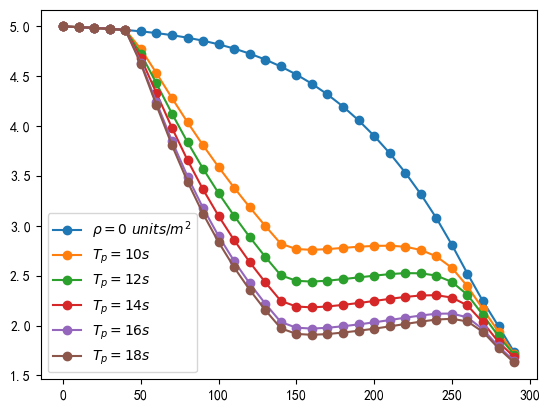

In [240]:
plt.plot(X1[15,:][:-1],Z0_Hs[15,:][:-1], '-o', label = '$\\rho=0\ units/m^2$',)
plt.plot(X1[15,:][:-1],ZHTp3_Hs[15,:][:-1], '-o', label = '$T_p=10s$',)
plt.plot(X1[15,:][:-1],ZHTp10_Hs[15,:][:-1]*1, '-o', label = '$T_p=12s$',)
plt.plot(X1[15,:][:-1],ZHTp14_Hs[15,:][:-1]*1, '-o', label = '$T_p=14s$',)
plt.plot(X1[15,:][:-1],ZHTp16_Hs[15,:][:-1]*1, '-o', label = '$T_p=16s$',)
plt.plot(X1[15,:][:-1],ZHTp18_Hs[15,:][:-1]*1, '-o', label = '$T_p=18s$',)
plt.legend(fontsize=10)

##### 关系图

In [245]:
x1 = np.array([10,12,14,16,18]) 
y1 = np.array([ZHTp3_Hs[15,15],ZHTp10_Hs[15,15],ZHTp14_Hs[15,15],ZHTp16_Hs[15,15],ZHTp18_Hs[15,15]])
y0 = np.array([ZHTp3_Hs[15,0],ZHTp10_Hs[15,0],ZHTp14_Hs[15,0],ZHTp16_Hs[15,0],ZHTp18_Hs[15,0]])
y1

array([2.76739, 2.44875, 2.19078, 1.9786 , 1.9161 ])

In [247]:
y1

(array([2.76739, 2.44875, 2.19078, 1.9786 , 1.9161 ]),
 array([5.00019, 5.00019, 5.00019, 5.00019, 5.00019]))

In [229]:
yK = (y0-y1)/y0 * 100
yK

array([44.65430314, 51.02686098, 56.18606493, 60.42950368, 61.67945618])

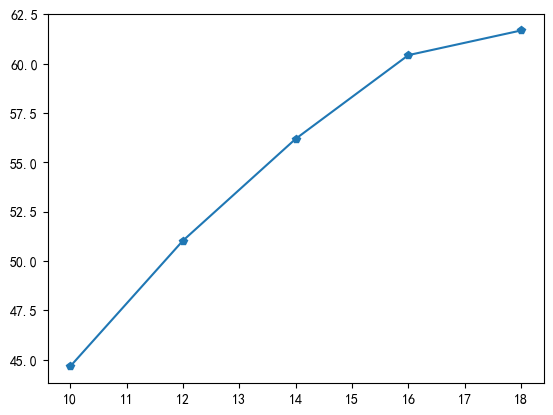

In [230]:
plt.plot(x1,yK,'-p')

##### 两者综合

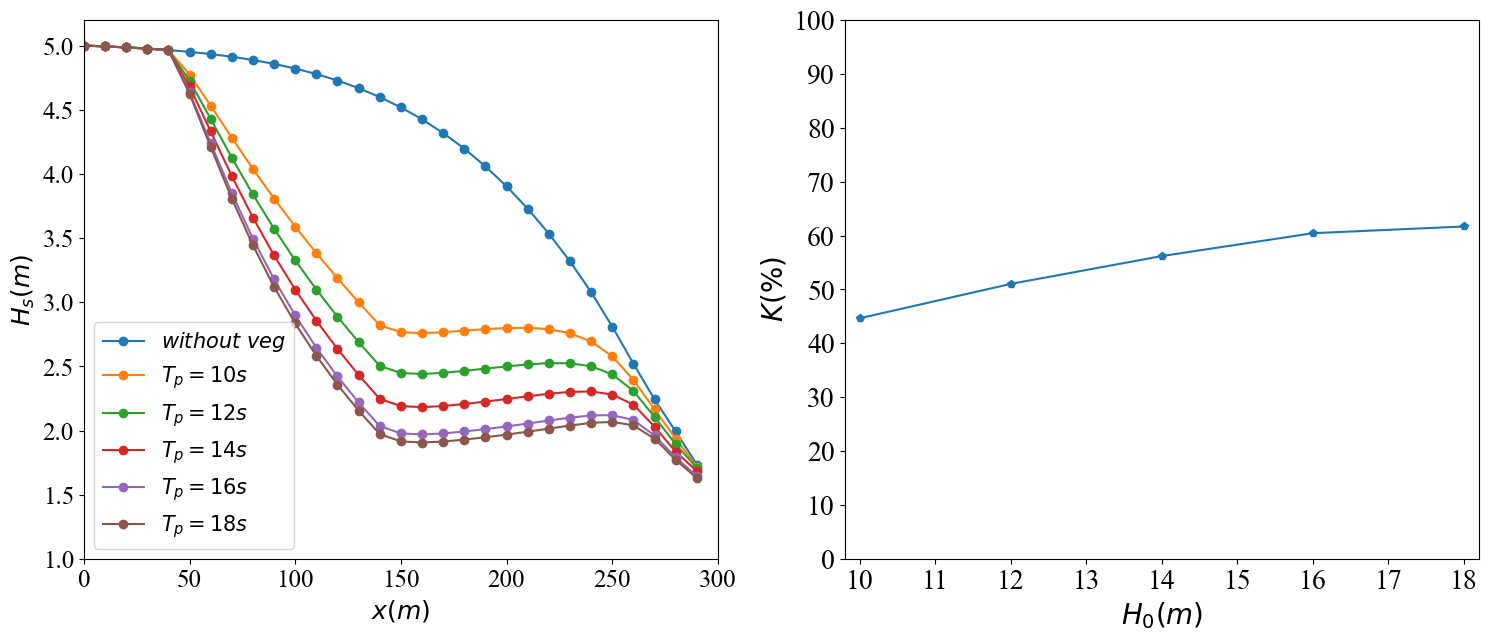

In [244]:
plt.figure(num=6,figsize = (18,7), facecolor=None)
plt.subplot(121)
plt.plot(X1[15,:][:-1],Z0_Hs[15,:][:-1], '-o', label = '$without \ veg$',)
plt.plot(X1[15,:][:-1],ZHTp3_Hs[15,:][:-1], '-o', label = '$T_p=10s$',)
plt.plot(X1[15,:][:-1],ZHTp10_Hs[15,:][:-1]*1, '-o', label = '$T_p=12s$',)
plt.plot(X1[15,:][:-1],ZHTp14_Hs[15,:][:-1]*1, '-o', label = '$T_p=14s$',)
plt.plot(X1[15,:][:-1],ZHTp16_Hs[15,:][:-1]*1, '-o', label = '$T_p=16s$',)
plt.plot(X1[15,:][:-1],ZHTp18_Hs[15,:][:-1]*1, '-o', label = '$T_p=18s$',)
plt.legend(fontsize=15)

plt.xlabel('$x(m)$', fontsize=18) 
plt.ylabel('$H_s(m)$', fontsize=18)
plt.xlim(0,300)
plt.ylim(1.0,5.2)
plt.xticks([0,50,100,150,200,250,300],fontproperties = 'Times New Roman',size = 18)
plt.yticks([1.0,1.5,2,2.5,3,3.5,4,4.5,5],fontproperties = 'Times New Roman',size = 18)

plt.subplot(122)

plt.plot(x1,yK,'-p')
plt.xlim(9.8,18.2)
plt.ylim(0,100)
plt.xticks([10,11,12,13,14,15,16,17,18],fontproperties = 'Times New Roman',size = 20)
plt.yticks([0,10,20,30,40,50,60,70,80,90,100],fontproperties = 'Times New Roman',size = 20)
plt.xlabel('$H_0(m)$', fontsize=20) 
plt.ylabel('$K(\%)$', fontsize=20)

plt.savefig('modelData/谱峰周期变化与波高关系图.png',dpi=500,bbox_inches='tight')

In [236]:
x1

array([10, 12, 14, 16, 18])

In [253]:
a[:,j]

array([[[ 2,  1],
        [ 3,  3]],

       [[ 6,  5],
        [ 7,  7]],

       [[10,  9],
        [11, 11]]])